In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import *

In [2]:
df = pd.read_csv('merged_data.csv')

In [3]:
missing_data = df.isnull()

In [4]:
missing_data.head(10)

,database_key,simulation_name,binary_type,reference_bibkeys,id_code,id_type,id_mass,id_rest_mass,id_mass_ratio,id_ADM_mass,...,neutrino_scheme,available_resolutions,NR_simulation_key,id_gw_NR_frequency_Hz,Hybrid_window_freq_Hz,TEOB_Lambda_starA,TEOB_Lambda_starB,TEOB_version,available_runs,id_eccentricity_3PN
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
5,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
7,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
8,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
9,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True


In [5]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print (column)
    print (missing_data[column].value_counts())
    print (' ')

database_key
database_key
False    299
Name: count, dtype: int64
 
simulation_name
simulation_name
False    299
Name: count, dtype: int64
 
binary_type
binary_type
False    297
True       2
Name: count, dtype: int64
 
reference_bibkeys
reference_bibkeys
False    295
True       4
Name: count, dtype: int64
 
id_code
id_code
False    299
Name: count, dtype: int64
 
id_type
id_type
False    299
Name: count, dtype: int64
 
id_mass
id_mass
False    299
Name: count, dtype: int64
 
id_rest_mass
id_rest_mass
False    299
Name: count, dtype: int64
 
id_mass_ratio
id_mass_ratio
False    299
Name: count, dtype: int64
 
id_ADM_mass
id_ADM_mass
False    299
Name: count, dtype: int64
 
id_ADM_angularmomentum
id_ADM_angularmomentum
False    299
Name: count, dtype: int64
 
id_gw_frequency_Hz
id_gw_frequency_Hz
False    299
Name: count, dtype: int64
 
id_gw_frequency_Momega22
id_gw_frequency_Momega22
False    299
Name: count, dtype: int64
 
id_eos
id_eos
False    299
Name: count, dtype: int64
 
id_kappa

In [6]:
df_nodup = df.drop_duplicates()
df_nodup = df_nodup.dropna(subset=['id_eccentricity','id_mass','id_ADM_mass','id_ADM_angularmomentum','id_gw_NR_frequency_Hz','id_mass_starB','id_spin_starB','id_mass_starA', 'id_spin_starA'])

In [7]:
print(df_nodup)

    database_key                      simulation_name binary_type  \
32      Hyb:0007    MS1b_1.650_1.100_0.00_0.00_0.0346         NaN   
40      Hyb:0004     MS1b_1.350_1.350_0.00_0.00_0.036         BNS   
43      Hyb:0001       2B_1.350_1.350_0.00_0.00_0.038         BNS   
45      Hyb:0003      H4_1.372_1.372_0.00_0.00_0.0367         BNS   
82      Hyb:0007    MS1b_1.500_1.000_0.00_0.00_0.0301         BNS   
86      Hyb:0018     SLy_1.351_1.351_0.11_0.11_0.0379         BNS   
95      Hyb:0010     SLy_1.500_1.000_0.00_0.00_0.0315         BNS   
113     Hyb:0014  MS1b_1.350_1.350_-0.10_-0.10_0.0357         BNS   
120     Hyb:0009    MS1b_1.527_1.222_0.00_0.00_0.0346         BNS   
139     Hyb:0013       H4_1.373_1.373_0.14_0.14_0.037         BNS   
160     Hyb:0017     SLy_1.350_1.350_0.05_0.05_0.0379         BNS   
169     Hyb:0012     SLy_1.650_1.098_0.00_0.00_0.0363         BNS   
177     Hyb:0016    MS1b_1.351_1.351_0.15_0.15_0.0357         BNS   
178     Hyb:0006     SLy_1.375_1.3

In [8]:
df_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 32 to 274
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   database_key                           18 non-null     object 
 1   simulation_name                        18 non-null     object 
 2   binary_type                            17 non-null     object 
 3   reference_bibkeys                      18 non-null     object 
 4   id_code                                18 non-null     object 
 5   id_type                                18 non-null     object 
 6   id_mass                                18 non-null     float64
 7   id_rest_mass                           18 non-null     float64
 8   id_mass_ratio                          18 non-null     float64
 9   id_ADM_mass                            18 non-null     float64
 10  id_ADM_angularmomentum                 18 non-null     float64
 11  id_gw_frequ

In [9]:
df_nodup = df_nodup[['id_eccentricity','id_mass','id_ADM_mass','id_ADM_angularmomentum','id_gw_NR_frequency_Hz','id_mass_starB','id_spin_starB','id_mass_starA', 'id_spin_starA']]

In [10]:
df_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 32 to 274
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_eccentricity         18 non-null     object 
 1   id_mass                 18 non-null     float64
 2   id_ADM_mass             18 non-null     float64
 3   id_ADM_angularmomentum  18 non-null     float64
 4   id_gw_NR_frequency_Hz   18 non-null     float64
 5   id_mass_starB           18 non-null     float64
 6   id_spin_starB           18 non-null     object 
 7   id_mass_starA           18 non-null     float64
 8   id_spin_starA           18 non-null     object 
dtypes: float64(6), object(3)
memory usage: 1.4+ KB


In [11]:
df_nodup.corr (numeric_only = True)

,id_mass,id_ADM_mass,id_ADM_angularmomentum,id_gw_NR_frequency_Hz,id_mass_starB,id_mass_starA
id_mass,1.000000,0.999959,0.870640,0.360870,0.615422,-0.056579
id_ADM_mass,0.999959,1.000000,0.868992,0.352990,0.609764,-0.049442
id_ADM_angularmomentum,0.870640,0.868992,1.000000,0.388440,0.747233,-0.317064
id_gw_NR_frequency_Hz,0.360870,0.352990,0.388440,1.000000,0.648953,-0.561122
id_mass_starB,0.615422,0.609764,0.747233,0.648953,1.000000,-0.821755
id_mass_starA,-0.056579,-0.049442,-0.317064,-0.561122,-0.821755,1.000000


In [12]:
print(df_nodup)

    id_eccentricity   id_mass  id_ADM_mass  id_ADM_angularmomentum  \
32     1.072272e-02  2.750025     2.729230                7.799167   
40     1.771270e-03  2.700064     2.678623                7.802087   
43     7.092541e-03  2.699952     2.677624                7.662564   
45     9.366474e-04  2.743466     2.721345                8.005147   
82     1.551585e-02  2.500017     2.482511                6.657108   
86     7.374461e-04  2.701216     2.678899                8.039139   
95     1.193778e-02  2.500015     2.482086                6.586921   
113    1.848777e-03  2.700796     2.679472                7.485762   
120    9.049843e-03  2.750025     2.728700                8.032192   
139    5.290890e-04  2.745176     2.722882                8.489730   
160    3.535570e-04  2.700297     2.678040                7.858842   
169    8.023282e-03  2.747904     2.726620                7.700118   
177    2.251789e-03  2.701736     2.680177                8.305419   
178    1.463161e-02 

In [13]:
corr = df.corr(numeric_only = True)
print(corr)

                                        id_mass  id_rest_mass  id_mass_ratio  \
id_mass                                1.000000      0.633124      -0.055150   
id_rest_mass                           0.633124      1.000000       0.047280   
id_mass_ratio                         -0.055150      0.047280       1.000000   
id_ADM_mass                            0.999605      0.632512      -0.053703   
id_ADM_angularmomentum                 0.877628      0.497354      -0.207343   
id_gw_frequency_Hz                     0.272296      0.150288       0.053693   
id_gw_frequency_Momega22               0.541862      0.306814      -0.034962   
id_kappa2T                            -0.421613     -0.494890       0.069751   
id_Lambda                             -0.416993     -0.487404       0.077494   
id_mass_starA                          0.444677      0.475811       0.647024   
id_rest_mass_starA                     0.231364      0.601456       0.625626   
id_mass_starB                          0

In [14]:
corr.style.background_gradient(cmap='coolwarm')

/root/venv/lib/python3.9/site-packages/pandas/io/formats/style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/root/venv/lib/python3.9/site-packages/pandas/io/formats/style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id_mass,id_rest_mass,id_mass_ratio,id_ADM_mass,id_ADM_angularmomentum,id_gw_frequency_Hz,id_gw_frequency_Momega22,id_kappa2T,id_Lambda,id_mass_starA,id_rest_mass_starA,id_mass_starB,id_rest_mass_starB,grid_refinement_levels,grid_refinement_levels_moving,grid_refinement_levels_npoints,grid_refinement_levels_moving_npoints,grid_spacing_min,hydro_atmosphere_level,hydro_atmosphere_factor,number_of_orbits,eos_evolution_Gamma_thermal,id_gw_NR_frequency_Hz,available_runs,id_eccentricity_3PN
id_mass,1.000000,0.633124,-0.055150,0.999605,0.877628,0.272296,0.541862,-0.421613,-0.416993,0.444677,0.231364,0.681613,0.550752,-0.161543,-0.456323,-0.068865,0.306322,0.092223,0.134166,-0.180103,-0.334349,nan,0.360870,nan,nan
id_rest_mass,0.633124,1.000000,0.047280,0.632512,0.497354,0.150288,0.306814,-0.494890,-0.487404,0.475811,0.601456,0.272837,0.624222,-0.128657,-0.437843,-0.056365,0.302215,0.084479,0.026101,-0.249102,-0.354384,nan,0.523541,nan,nan
id_mass_ratio,-0.055150,0.047280,1.000000,-0.053703,-0.207343,0.053693,-0.034962,0.069751,0.077494,0.647024,0.625626,-0.586192,-0.550980,-0.138874,-0.014425,-0.252962,-0.124016,0.286403,-0.149155,0.045849,0.108482,nan,-0.648086,nan,nan
id_ADM_mass,0.999605,0.632512,-0.053703,1.000000,0.883072,0.263815,0.530055,-0.420518,-0.415982,0.447086,0.233340,0.679232,0.548151,-0.153348,-0.454607,-0.068191,0.306470,0.091611,0.133283,-0.172412,-0.325873,nan,0.352990,nan,nan
id_ADM_angularmomentum,0.877628,0.497354,-0.207343,0.883072,1.000000,0.002814,0.193962,-0.306285,-0.307462,0.306092,0.103721,0.666963,0.513032,-0.007087,-0.269910,0.025070,0.285235,0.030440,0.155868,0.106582,0.032475,nan,0.388440,nan,nan
id_gw_frequency_Hz,0.272296,0.150288,0.053693,0.263815,0.002814,1.000000,0.680844,-0.134527,-0.127112,0.105417,0.039151,0.198396,0.147108,-0.499192,-0.253770,-0.090229,0.085360,0.141308,0.107301,-0.337662,-0.448580,nan,nan,nan,nan
id_gw_frequency_Momega22,0.541862,0.306814,-0.034962,0.530055,0.193962,0.680844,1.000000,-0.279642,-0.271903,0.188466,0.063757,0.412217,0.313464,-0.437969,-0.317753,-0.086392,0.110862,0.098019,0.059650,-0.536395,-0.628083,nan,0.904706,nan,nan
id_kappa2T,-0.421613,-0.494890,0.069751,-0.420518,-0.306285,-0.134527,-0.279642,1.000000,0.993790,-0.280006,-0.294414,-0.211798,-0.307675,0.019181,0.229788,-0.157289,-0.110642,-0.080080,0.178136,0.345480,0.181563,nan,-0.717123,nan,nan
id_Lambda,-0.416993,-0.487404,0.077494,-0.415982,-0.307462,-0.127112,-0.271903,0.993790,1.000000,-0.302576,-0.313532,-0.188533,-0.280182,0.021698,0.229056,-0.154621,-0.109495,-0.085054,0.172278,0.331810,0.171914,nan,-0.714199,nan,nan
id_mass_starA,0.444677,0.475811,0.647024,0.447086,0.306092,0.105417,0.188466,-0.280006,-0.302576,1.000000,0.911066,-0.352291,-0.300209,-0.251016,-0.336755,-0.185958,0.128056,0.356403,0.013790,0.012682,-0.061889,nan,-0.561122,nan,nan


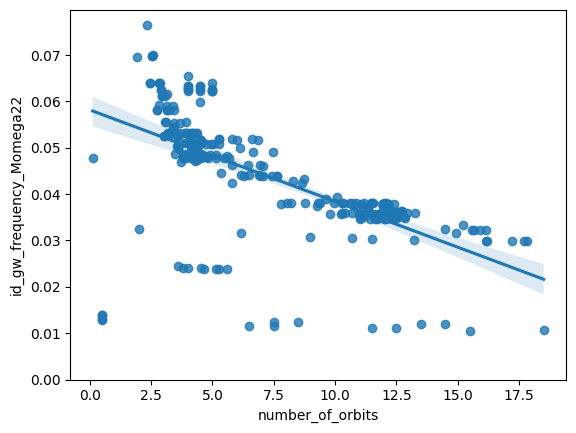

In [15]:
sns.regplot(x = 'number_of_orbits', y = 'id_gw_frequency_Momega22', data = df)
plt.ylim(0, )
plt.show()

<AxesSubplot: xlabel='id_gw_NR_frequency_Hz', ylabel='Count'>

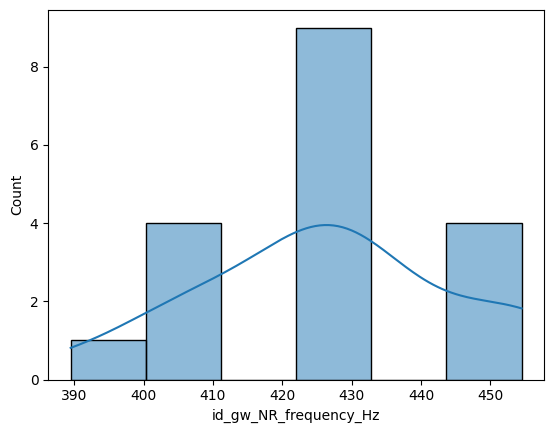

In [16]:
sns.histplot(df['id_gw_NR_frequency_Hz'], kde=True)

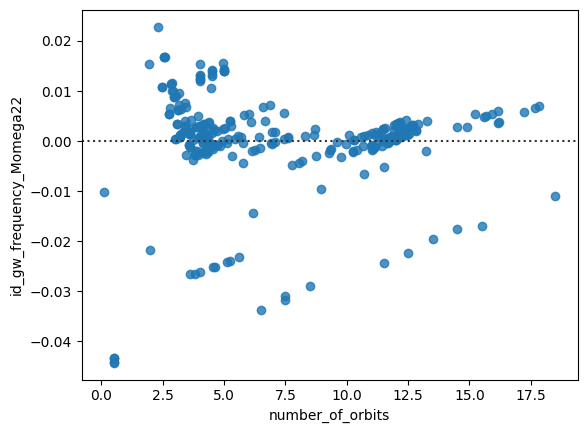

In [17]:
sns.residplot (x=df['number_of_orbits'],y=df['id_gw_frequency_Momega22'])
plt.show()

In [18]:
df_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 32 to 274
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_eccentricity         18 non-null     object 
 1   id_mass                 18 non-null     float64
 2   id_ADM_mass             18 non-null     float64
 3   id_ADM_angularmomentum  18 non-null     float64
 4   id_gw_NR_frequency_Hz   18 non-null     float64
 5   id_mass_starB           18 non-null     float64
 6   id_spin_starB           18 non-null     object 
 7   id_mass_starA           18 non-null     float64
 8   id_spin_starA           18 non-null     object 
dtypes: float64(6), object(3)
memory usage: 1.4+ KB


In [19]:
df_nodup[['id_eccentricity']]=df_nodup[['id_eccentricity']].astype('float')

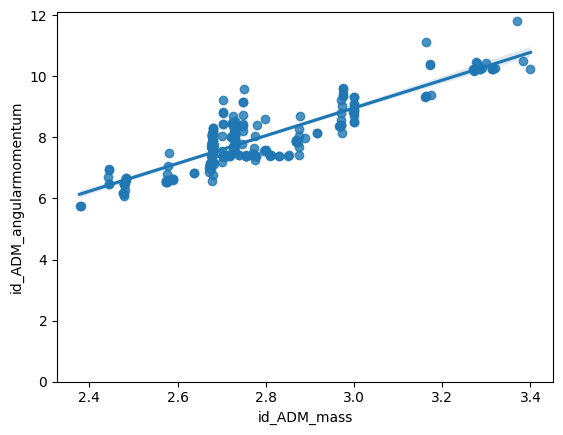

-4.683186598628991 4.550206170908015


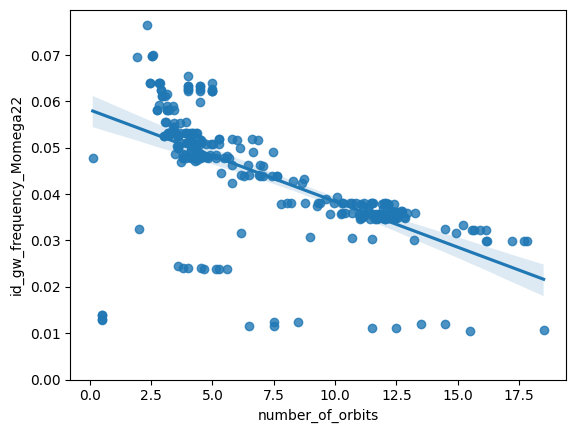

0.058162009358282675 -0.001974210898828748


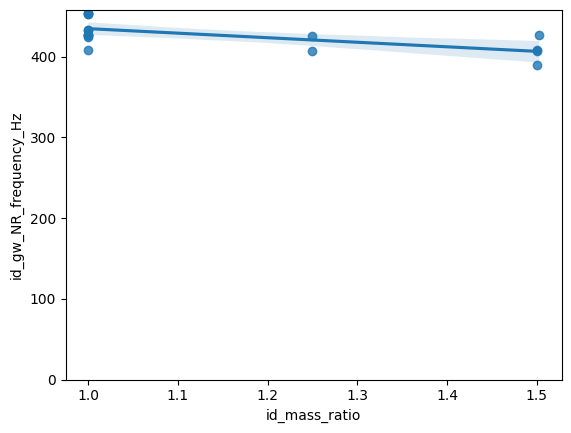

490.8819944295571 -56.226186048543305


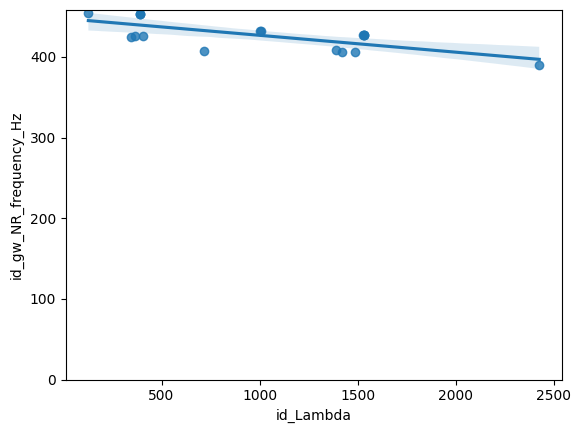

447.7021017216817 -0.02089071126175496


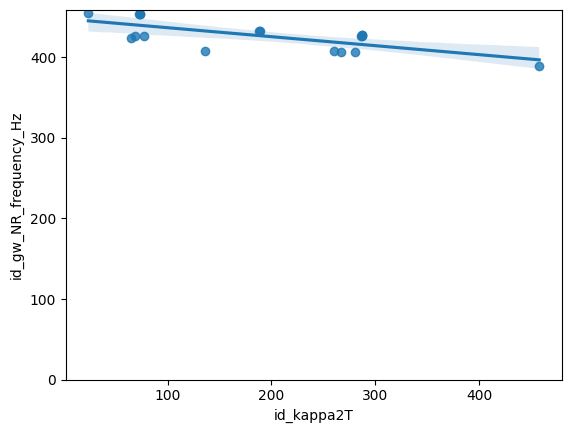

447.76883915152354 -0.11147759744699075


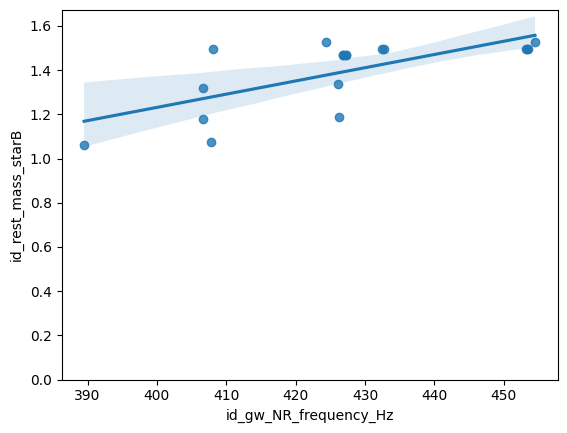

-1.1614130524162094 0.005981652046798534


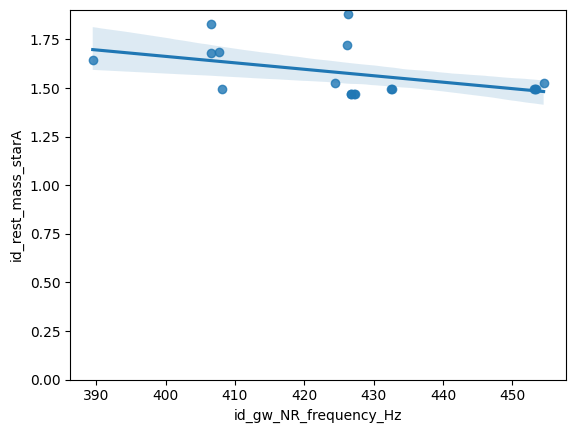

2.990432103685201 -0.0033189860611669425


In [20]:
df_corr = df.corr(numeric_only=True).fillna(0.0)
df_nonan = df.dropna()
arr = [
    ['id_ADM_mass', 'id_ADM_angularmomentum'],
    ['number_of_orbits', 'id_gw_frequency_Momega22'],
        ['id_mass_ratio', 'id_gw_NR_frequency_Hz'],
        ['id_Lambda', 'id_gw_NR_frequency_Hz'],
        ['id_kappa2T', 'id_gw_NR_frequency_Hz'],
        ['id_gw_NR_frequency_Hz', 'id_rest_mass_starB'],
        ['id_gw_NR_frequency_Hz', 'id_rest_mass_starA'],
]
for i in range(len(arr)):
    p = sns.regplot(x = arr[i][0], y = arr[i][1], data = df)
    plt.ylim(0, )
    plt.show()  
    slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())
    print(intercept, slope)

    

In [21]:
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_kappa2T', 'id_Lambda']].values
X[0:5]


array([[  2.77062   ,   7.44301   ,   1.        , 129.49314306,
        690.63009631],
       [  2.88966   ,   7.99412   ,   1.        ,  46.59033323,
        248.48177723],
       [  2.682408  ,   7.135314  ,   2.000037  , 109.5427    ,
        567.0299    ],
       [  2.876201  ,   8.035358  ,   1.62497196, 158.8977    ,
        828.46838308],
       [  2.703     ,   7.398     ,   1.        , 119.76062512,
        638.72333397]])

In [22]:
y = df["id_gw_frequency_Hz"]
y[0:5]

0    671.36400
1    681.95200
2    385.48500
3    541.20035
4    564.95000
Name: id_gw_frequency_Hz, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [ ]:

important_columns = ['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_kappa2T', 'id_Lambda']
available_columns = [col for col in important_columns if col in df.columns]
X = df[available_columns].values
y = df["id_gw_frequency_Hz"]


mask = ~np.isnan(X).any(axis=1)
X = X[mask]
y = y[mask]


X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:


print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (209, 5) &  Size of Y training set (209,)


In [ ]:

print('Shape of X test set {}'.format(X_testset.shape),'&','Size of y test set {}'.format(y_testset.shape))


Shape of X test set (90, 5) & Size of y test set (90,)


In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
from sklearn.tree import DecisionTreeRegressor

drugTree = DecisionTreeRegressor(max_depth=4)
drugTree.fit(X_trainset,y_trainset)

DecisionTreeRegressor(max_depth=4)

In [29]:
predTree = drugTree.predict(X_testset)

In [30]:
print (predTree [0:5])
print (y_testset [0:5])


[623.57246724 618.83609428 548.04478996 401.38445207 623.57246724]
84     652.7140
217    608.7340
211    340.2870
285    454.5656
31     653.8800
Name: id_gw_frequency_Hz, dtype: float64


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt


mse = metrics.mean_squared_error(y_testset, predTree)
print("Decision Tree's Mean Squared Error: ", mse)

Decision Tree's Mean Squared Error:  17924.31101780005


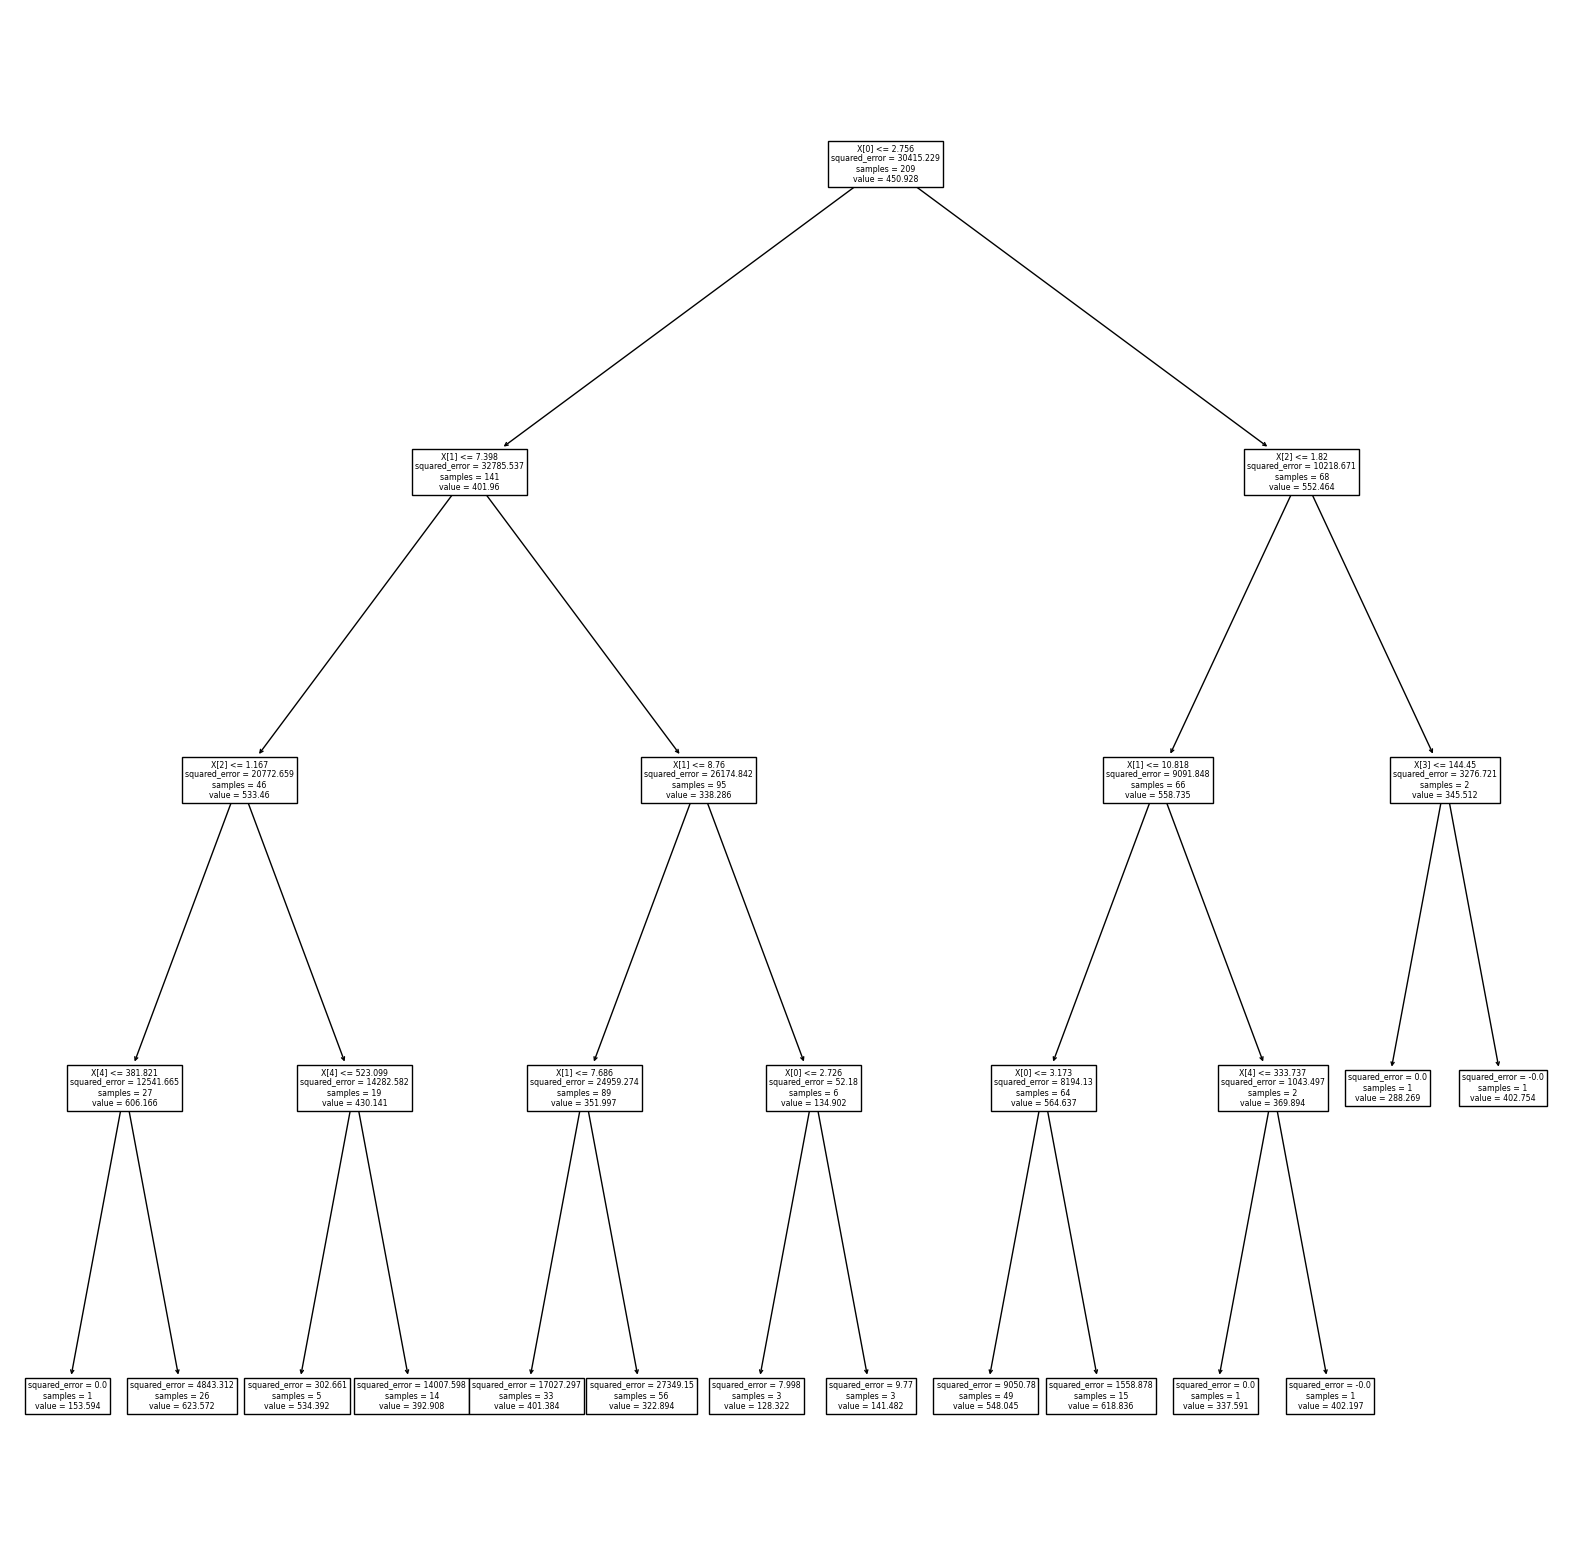

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(drugTree)
plt.show()

In [ ]:


x = df[['id_ADM_mass', 'id_ADM_angularmomentum']]
x.head()

,id_ADM_mass,id_ADM_angularmomentum
0,2.770620,7.443010
1,2.889660,7.994120
2,2.682408,7.135314
3,2.876201,8.035358
4,2.703000,7.398000


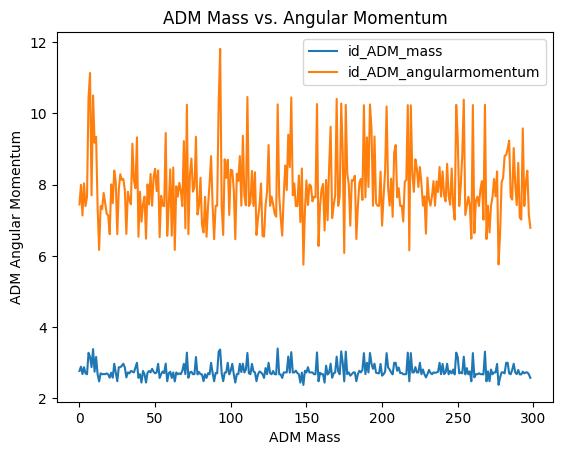

In [34]:
x.plot(kind = 'line')
plt.title('ADM Mass vs. Angular Momentum')
plt.xlabel('ADM Mass')
plt.ylabel('ADM Angular Momentum')
plt.show()

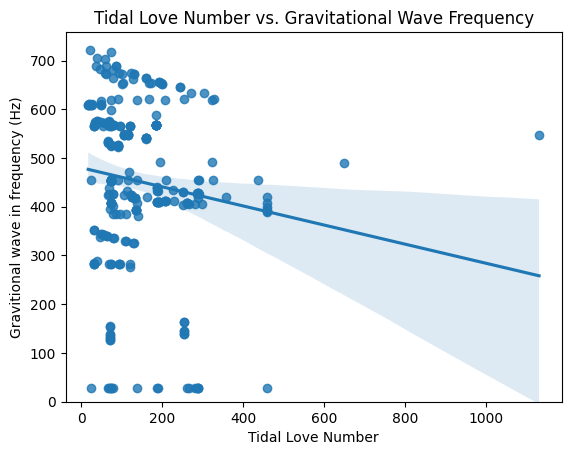

479.9857829407018 -0.1957981316894953


In [35]:


# Create the regplot
plot = sns.regplot(x='id_kappa2T', y='id_gw_frequency_Hz', data=df)
plt.ylim(0, )
plt.xlabel('Tidal Love Number')
plt.ylabel('Gravitional wave in frequency (Hz)')
plt.title('Tidal Love Number vs. Gravitational Wave Frequency')
plt.show()

# Linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=plot.get_lines()[0].get_xdata(), y=plot.get_lines()[0].get_ydata())
print(intercept, slope)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [37]:
x=df.iloc[:,0:1].values # all rows, only 0 column
y=df.iloc[:,9].values
print(x)
print(y)

[['THC:0006:R01']
 ['THC:0035:R01']
 ['BAM:0130:R01']
 ['BAM:0159:R01']
 ['THC:0081:R01']
 ['BAM:0098:R01']
 ['BAM:0138:R01']
 ['BAM:0016:R01']
 ['BAM:0160:R01']
 ['THC:0027:R01']
 ['BAM:0074:R01']
 ['THC:0107:R01']
 ['BAM:0162:R01']
 ['THC:0011:R01']
 ['THC:0079:R01']
 ['BAM:0102:R01']
 ['BAM:0175:R01']
 ['BAM:0062:R01']
 ['BAM:0115:R01']
 ['BAM:0036:R01']
 ['THC:0002:R01']
 ['BAM:0037:R01']
 ['BAM:0134:R01']
 ['BAM:0150:R01']
 ['BAM:0020:R01']
 ['BAM:0082:R01']
 ['BAM:0156:R01']
 ['BAM:0157:R01']
 ['THC:0104:R01']
 ['BAM:0154:R01']
 ['BAM:0094:R01']
 ['THC:0031:R01']
 ['Hyb:0007']
 ['BAM:0119:R01']
 ['THC:0059:R01']
 ['BAM:0078:R01']
 ['BAM:0006:R01']
 ['THC:0103:R01']
 ['BAM:0034:R01']
 ['THC:0015:R01']
 ['Hyb:0004']
 ['BAM:0111:R01']
 ['THC:0102:R01']
 ['Hyb:0001']
 ['BAM:0110:R01']
 ['Hyb:0003']
 ['THC:0016:R01']
 ['BAM:0007:R01']
 ['THC:0078:R01']
 ['BAM:0079:R01']
 ['BAM:0118:R01']
 ['BAM:0053:R01']
 ['THC:0008:R01']
 ['THC:0032:R01']
 ['BAM:0095:R01']
 ['THC:0083:R01']
 ['THC:0

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()


In [40]:
X = df[['id_ADM_mass']]
Y = df['id_ADM_angularmomentum']

In [41]:
lm.fit(X, Y)

LinearRegression()

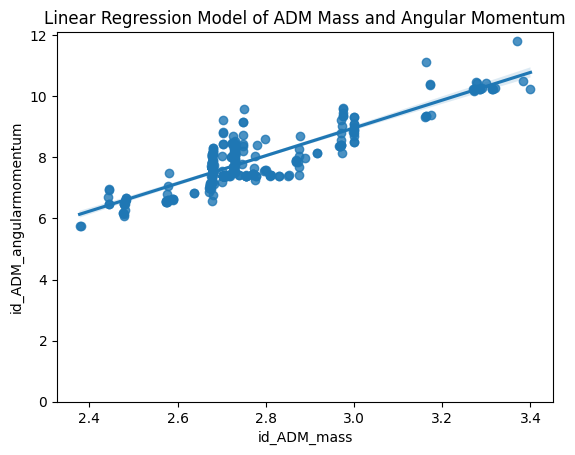

In [42]:
sns.regplot (data = df, x = X, y = Y).set(title = "Linear Regression Model of ADM Mass and Angular Momentum")
plt.ylim(0,)
plt.show()

In [43]:
print('R^2 = ', lm.score (X,Y))

R^2 =  0.7798170289180397


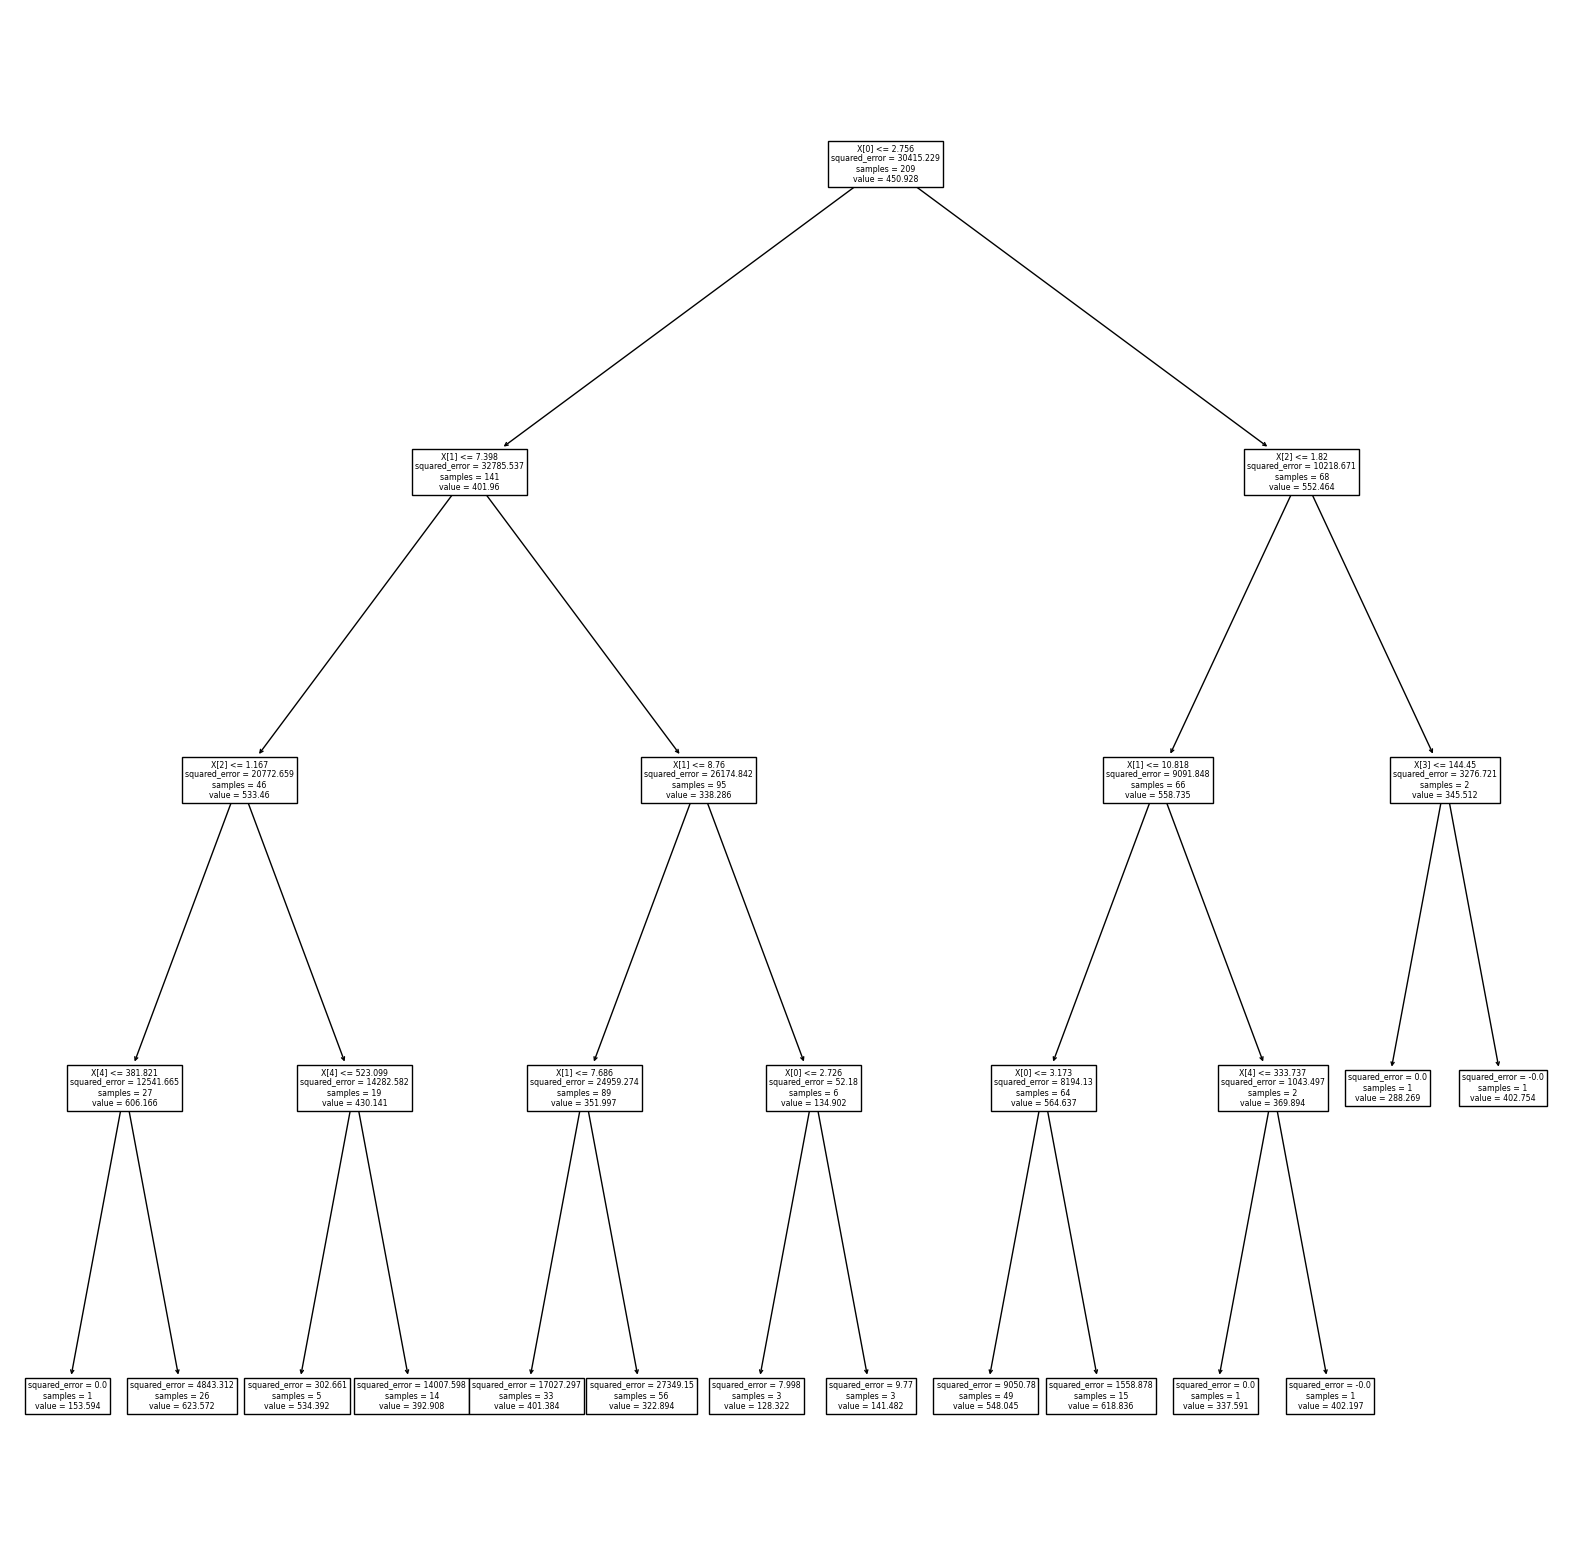

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(drugTree)
plt.show()

In [ ]:

X_trainset.shape, y_trainset.shape

((209, 5), (209,))

In [46]:
# Check the size of the test set for the decision tree model (drugTree)
X_testset.shape, y_testset.shape

((90, 5), (90,))

In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [48]:
A = df[['id_kappa2T']]
B = df['id_gw_frequency_Hz']

In [49]:
lm.fit(X, Y)

LinearRegression()

In [50]:
lm.fit(A, B)

LinearRegression()

In [51]:
print('R^2 = ', lm.score (A,B))

R^2 =  0.018097481300851204


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
file_path = 'merged_data.csv'
df = pd.read_csv(file_path)

# Define the features and target variable
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_kappa2T', 'id_Lambda']].values
y = df['id_gw_frequency_Hz'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=3)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
rf_r2 = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)

rf_r2, rf_mse

(0.23034038715984584, 17204.860231386854)

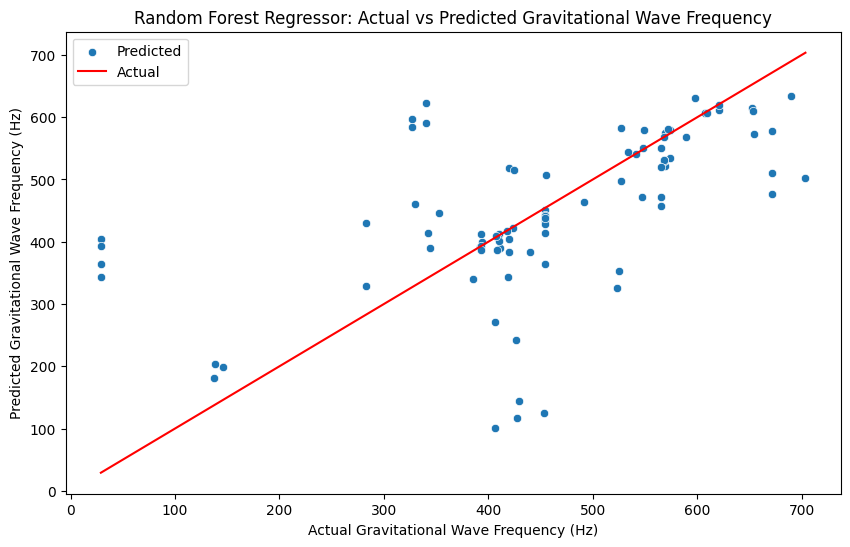

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', label='Actual')
plt.xlabel('Actual Gravitational Wave Frequency (Hz)')
plt.ylabel('Predicted Gravitational Wave Frequency (Hz)')
plt.title('Random Forest Regressor: Actual vs Predicted Gravitational Wave Frequency')
plt.legend()
plt.show()

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define the features and target variable
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_kappa2T', 'id_Lambda']].values
y = df['id_gw_frequency_Hz'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the DecisionTreeRegressor with optimized parameters
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=3)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
dt_r2 = r2_score(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)

dt_r2, dt_mse

(-0.25574145161340156, 28070.663708132484)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the features and target variable
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_kappa2T', 'id_Lambda']].values
y = df['id_gw_frequency_Hz'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=3)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Predict on the test data
y_pred_best_dt = best_dt.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
best_dt_r2 = r2_score(y_test, y_pred_best_dt)
best_dt_mse = mean_squared_error(y_test, y_pred_best_dt)

best_dt_r2, best_dt_mse

(0.0913412169167287, 20312.027681016625)

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize the DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=3)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='r2', random_state=3)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_dt_random = random_search.best_estimator_

# Predict on the test data
y_pred_best_dt_random = best_dt_random.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
best_dt_random_r2 = r2_score(y_test, y_pred_best_dt_random)
best_dt_random_mse = mean_squared_error(y_test, y_pred_best_dt_random)

best_dt_random_r2, best_dt_random_mse

(0.2205763963385362, 17423.12307716783)

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=3)

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Predict on the test data
y_pred_gbr = gbr.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
gbr_r2 = r2_score(y_test, y_pred_gbr)
gbr_mse = mean_squared_error(y_test, y_pred_gbr)

gbr_r2, gbr_mse

(0.25382517012015704, 16679.88477255305)

In [58]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 1.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [59]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svr = SVR()

# Fit the model on the training data
svr.fit(X_train, y_train)

# Predict on the test data
y_pred_svr = svr.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)

svr_r2, svr_mse

(0.016482196807514615, 21985.4154443227)

In [60]:
from xgboost import XGBRegressor

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=3)

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)

xgb_r2, xgb_mse

(0.02847938768232139, 21717.231965903404)

In [61]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('gbr', GradientBoostingRegressor(random_state=3)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=3)),
    ('xgb', XGBRegressor(random_state=3))
]

# Define the meta-model
meta_model = LinearRegression()

# Initialize the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the model on the training data
stacking_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_stacking = stacking_regressor.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
stacking_r2 = r2_score(y_test, y_pred_stacking)
stacking_mse = mean_squared_error(y_test, y_pred_stacking)

stacking_r2, stacking_mse

(0.3073331288131357, 15483.775563727104)

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the base models with pipelines for scaling
base_models = [
    ('gbr', Pipeline([('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor(random_state=3))])),
    ('rf', Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor(n_estimators=100, random_state=3))])),
    ('xgb', Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor(random_state=3))]))
]

# Define the meta-model
meta_model = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])

# Initialize the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the model on the training data
stacking_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_stacking = stacking_regressor.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
stacking_r2 = r2_score(y_test, y_pred_stacking)
stacking_mse = mean_squared_error(y_test, y_pred_stacking)

stacking_r2, stacking_mse

(0.30881471631118684, 15450.656369996157)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Define the features and target variable
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_kappa2T', 'id_Lambda', 'id_gw_frequency_Hz']].values
y = df['id_mass_ratio'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor
gbr_mass_ratio = GradientBoostingRegressor(random_state=3)

# Fit the model on the training data
gbr_mass_ratio.fit(X_train, y_train)

# Predict on the test data
y_pred_gbr_mass_ratio = gbr_mass_ratio.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
gbr_mass_ratio_r2 = r2_score(y_test, y_pred_gbr_mass_ratio)
gbr_mass_ratio_mse = mean_squared_error(y_test, y_pred_gbr_mass_ratio)

gbr_mass_ratio_r2, gbr_mass_ratio_mse

(0.5597885923887136, 0.019149389750214338)

In [64]:
# Check the size of the training set for the Gradient Boosting Regressor model for predicting the mass ratio
X_train.shape, y_train.shape

((209, 5), (209,))

In [65]:
# Check the size of the testing set for the Gradient Boosting Regressor model for predicting the mass ratio
X_test.shape, y_test.shape

((90, 5), (90,))

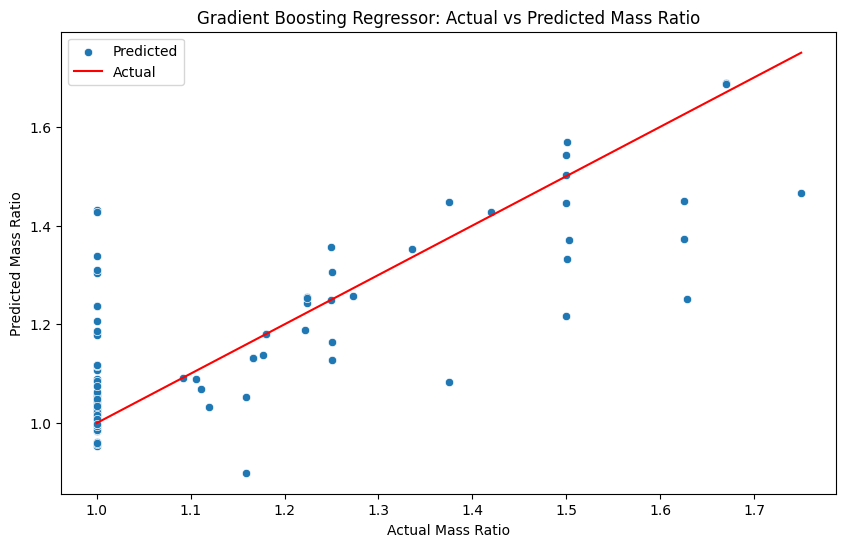

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted values for mass ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr_mass_ratio, label='Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', label='Actual')
plt.xlabel('Actual Mass Ratio')
plt.ylabel('Predicted Mass Ratio')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Mass Ratio')
plt.legend()
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Define the features and target variable
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_kappa2T', 'id_Lambda']].values
y = df['id_gw_frequency_Hz'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=3)

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Predict on the test data
y_pred_gbr = gbr.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
gbr_r2 = r2_score(y_test, y_pred_gbr)
gbr_mse = mean_squared_error(y_test, y_pred_gbr)

gbr_r2, gbr_mse

(0.25382517012015704, 16679.88477255305)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Define the features and target variable
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_Lambda', 'id_gw_frequency_Hz']].values
y = df['id_kappa2T'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor
gbr_kappa2T = GradientBoostingRegressor(random_state=3)

# Fit the model on the training data
gbr_kappa2T.fit(X_train, y_train)



# Predict on the test data
y_pred_gbr_kappa2T = gbr_kappa2T.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
gbr_kappa2T_r2 = r2_score(y_test, y_pred_gbr_kappa2T)
gbr_kappa2T_mse = mean_squared_error(y_test, y_pred_gbr_kappa2T)

gbr_kappa2T_r2, gbr_kappa2T_mse

(0.9491141984797533, 546.5505269556235)

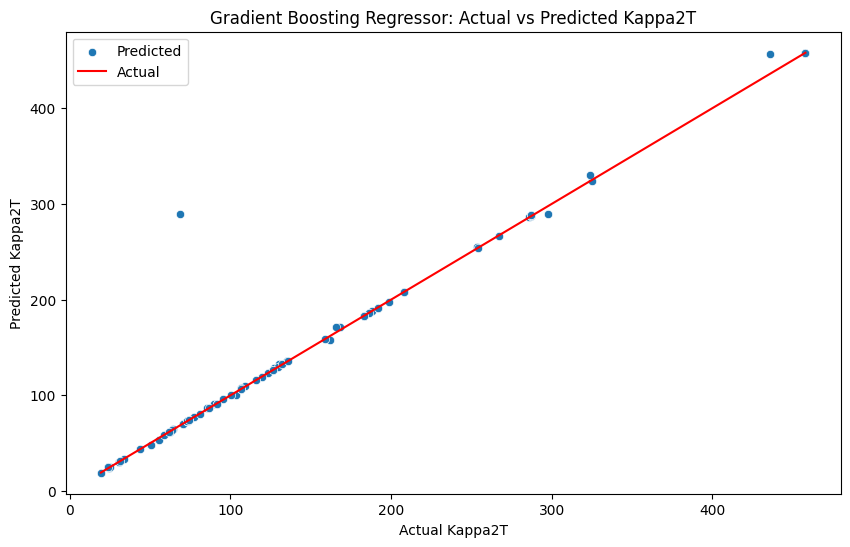

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted values for Kappa2T
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr_kappa2T, label='Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', label='Actual')
plt.xlabel('Actual Kappa2T')
plt.ylabel('Predicted Kappa2T')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Kappa2T')
plt.legend()
plt.show()

In [70]:
# Check for overfitting by comparing training and testing performance

# Predict on the training data
y_train_pred_gbr_kappa2T = gbr_kappa2T.predict(X_train)

# Calculate the R^2 value and Mean Squared Error for training data
gbr_kappa2T_r2_train = r2_score(y_train, y_train_pred_gbr_kappa2T)
gbr_kappa2T_mse_train = mean_squared_error(y_train, y_train_pred_gbr_kappa2T)

gbr_kappa2T_r2_train, gbr_kappa2T_mse_train

(0.9999941683326883, 0.08327189274437218)

In [71]:
X_train.shape, y_train.shape

((209, 5), (209,))

In [72]:
X_test.shape, y_test.shape

((90, 5), (90,))

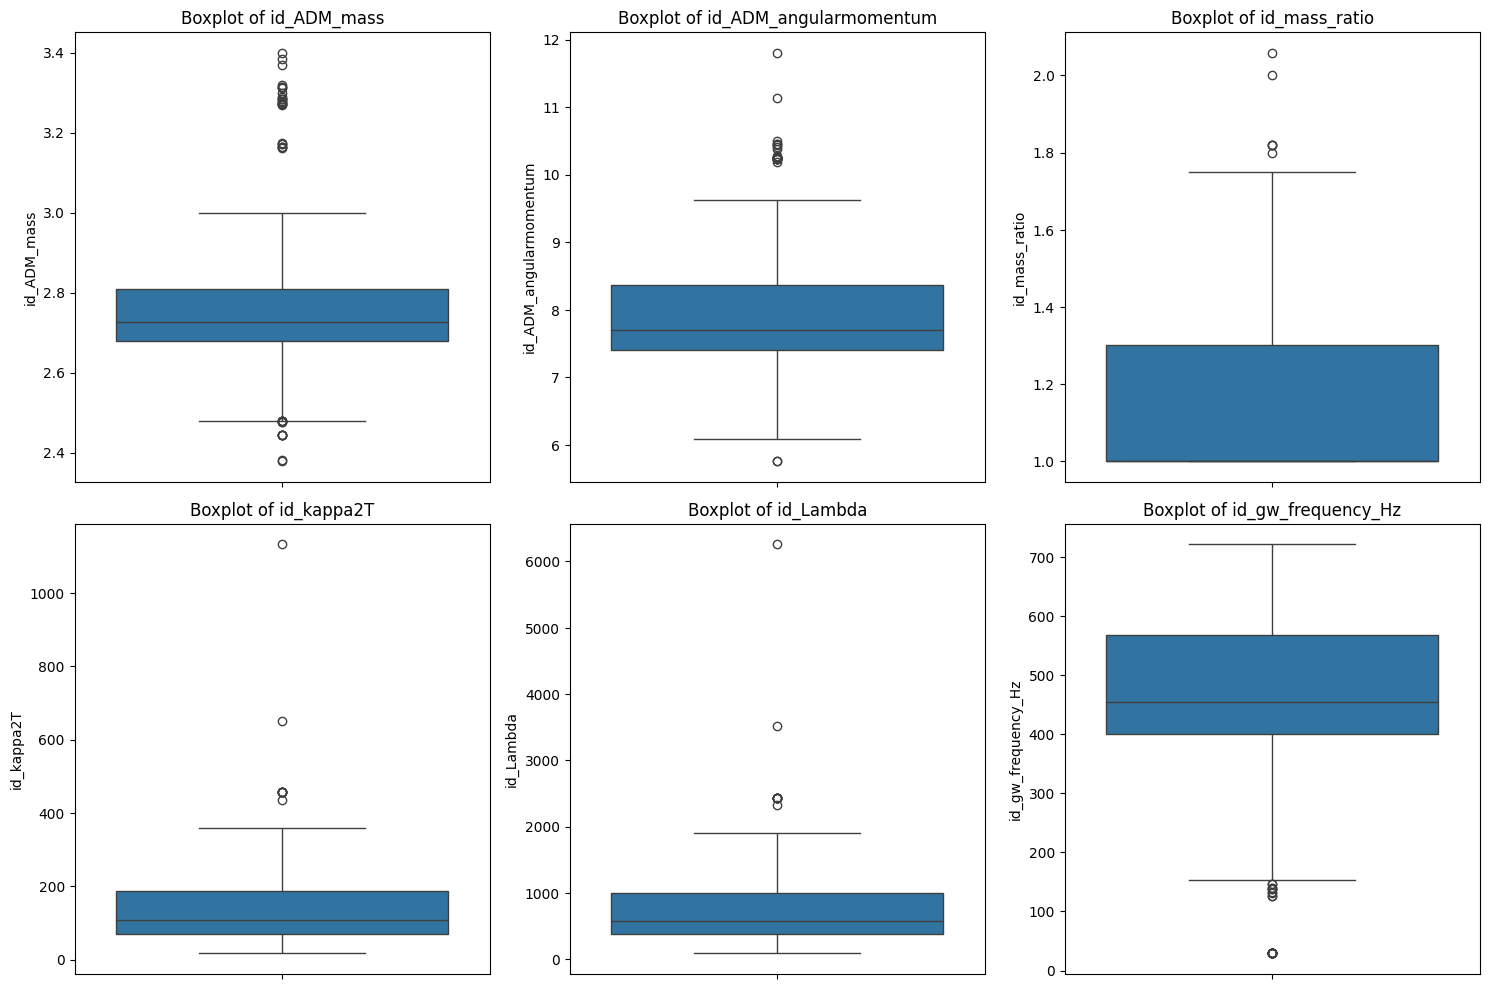

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots to check for outliers in the features
features = ['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_kappa2T', 'id_Lambda', 'id_gw_frequency_Hz']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

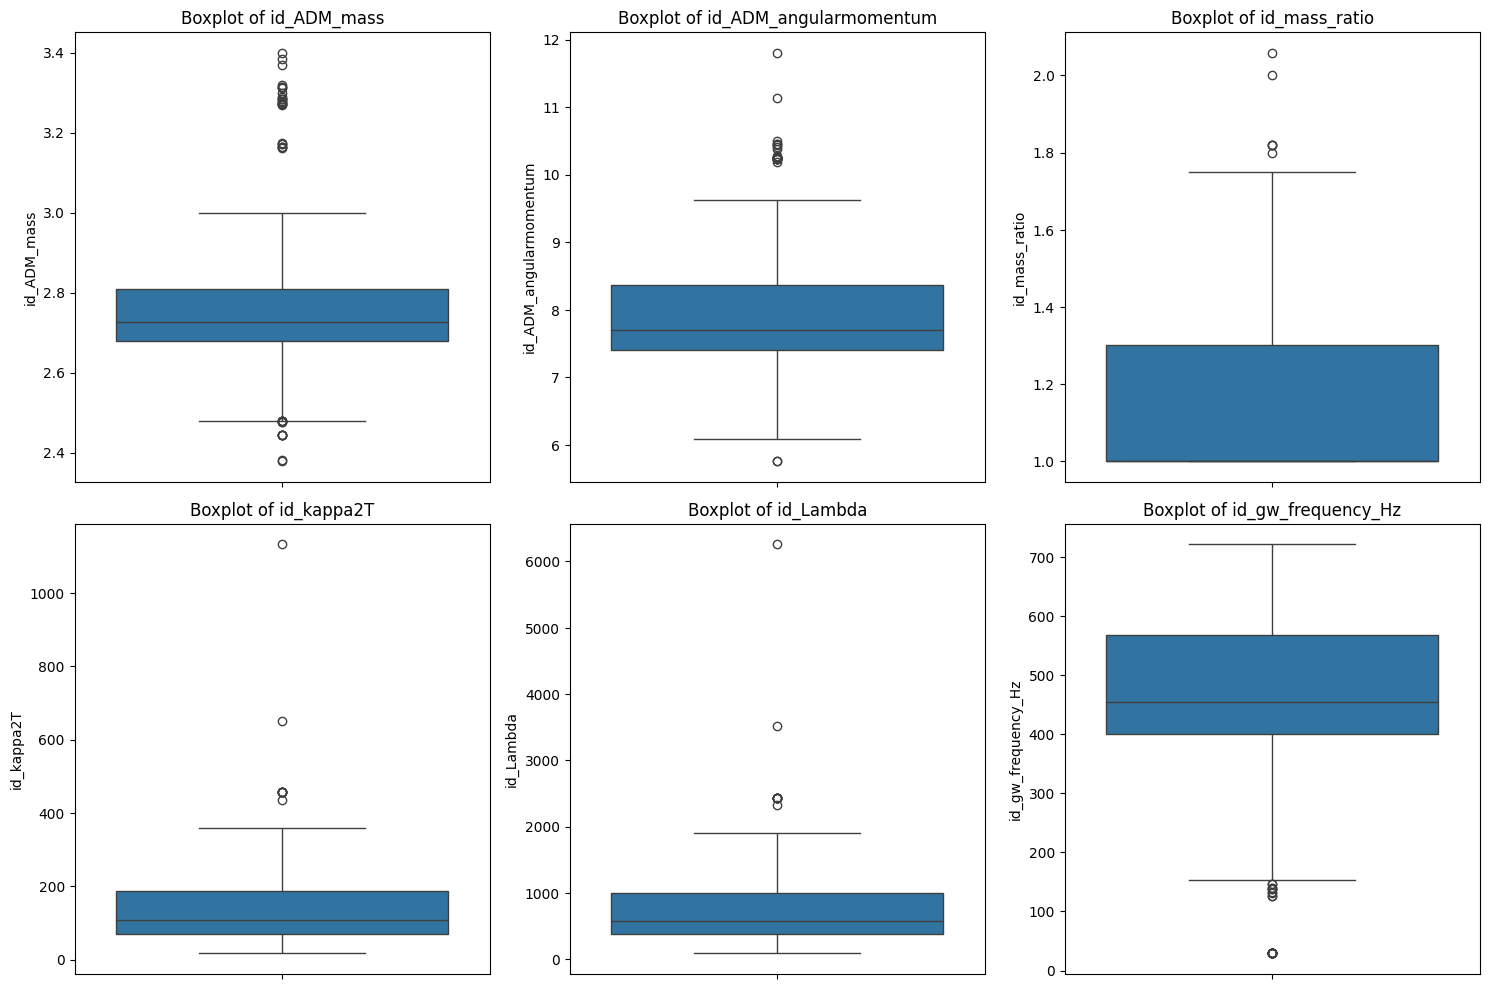

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots to check for outliers in the features
features = ['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_kappa2T', 'id_Lambda', 'id_gw_frequency_Hz']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [75]:
# Check for overfitting by comparing training and testing performance

# Predict on the training data
y_train_pred_gbr = gbr.predict(X_train)

# Calculate the R^2 value and Mean Squared Error for training data
gbr_r2_train = r2_score(y_train, y_train_pred_gbr)
gbr_mse_train = mean_squared_error(y_train, y_train_pred_gbr)

gbr_r2_train, gbr_mse_train

(-6.613812694608973, 108719.60970824177)

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define the features and target variable
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_kappa2T', 'id_Lambda']].values
y = df['id_gw_frequency_Hz'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=3)

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Predict on the training data
y_train_pred_gbr = gbr.predict(X_train)

# Calculate the R^2 value and Mean Squared Error for training data
gbr_r2_train = r2_score(y_train, y_train_pred_gbr)
gbr_mse_train = mean_squared_error(y_train, y_train_pred_gbr)

gbr_r2_train, gbr_mse_train

(0.7856903731188868, 6518.276321762727)

In [77]:
# Check for overfitting by comparing training and testing performance for Kappa2T

# Predict on the training data
y_train_pred_gbr_kappa2T = gbr_kappa2T.predict(X_train)

# Calculate the R^2 value and Mean Squared Error for training data
gbr_kappa2T_r2_train = r2_score(y_train, y_train_pred_gbr_kappa2T)
gbr_kappa2T_mse_train = mean_squared_error(y_train, y_train_pred_gbr_kappa2T)

gbr_kappa2T_r2_train, gbr_kappa2T_mse_train

(-5.870132523050442, 208956.65213030262)

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define the features and target variable
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_Lambda', 'id_gw_frequency_Hz']].values
y = df['id_kappa2T'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor
gbr_kappa2T = GradientBoostingRegressor(random_state=3)

# Fit the model on the training data
gbr_kappa2T.fit(X_train, y_train)

# Predict on the training data
y_train_pred_gbr_kappa2T = gbr_kappa2T.predict(X_train)

# Calculate the R^2 value and Mean Squared Error for training data
gbr_kappa2T_r2_train = r2_score(y_train, y_train_pred_gbr_kappa2T)
gbr_kappa2T_mse_train = mean_squared_error(y_train, y_train_pred_gbr_kappa2T)

gbr_kappa2T_r2_train, gbr_kappa2T_mse_train

(0.9999941683326883, 0.08327189274437218)

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Initialize the GradientBoostingRegressor
gbr_kappa2T = GradientBoostingRegressor(random_state=3)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr_kappa2T, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_gbr_kappa2T = grid_search.best_estimator_

# Predict on the test data
y_pred_best_gbr_kappa2T = best_gbr_kappa2T.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
best_gbr_kappa2T_r2 = r2_score(y_test, y_pred_best_gbr_kappa2T)
best_gbr_kappa2T_mse = mean_squared_error(y_test, y_pred_best_gbr_kappa2T)

best_gbr_kappa2T_r2, best_gbr_kappa2T_mse

(0.9478329487990966, 560.3120806150665)

In [80]:
from sklearn.model_selection import cross_val_score

# Initialize the GradientBoostingRegressor with the best parameters found
best_gbr_kappa2T = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    learning_rate=0.1, 
    random_state=3
)

# Perform cross-validation
cv_scores = cross_val_score(best_gbr_kappa2T, X_train, y_train, cv=5, scoring='r2')

# Fit the model on the training data
best_gbr_kappa2T.fit(X_train, y_train)

# Predict on the test data
y_pred_best_gbr_kappa2T = best_gbr_kappa2T.predict(X_test)

# Calculate the R^2 value and Mean Squared Error
best_gbr_kappa2T_r2 = r2_score(y_test, y_pred_best_gbr_kappa2T)
best_gbr_kappa2T_mse = mean_squared_error(y_test, y_pred_best_gbr_kappa2T)

cv_scores, best_gbr_kappa2T_r2, best_gbr_kappa2T_mse

(array([0.99870838, 0.77878669, 0.92923908, 0.99981953, 0.99948015]),
 0.9482365684626259,
 555.9769118017414)

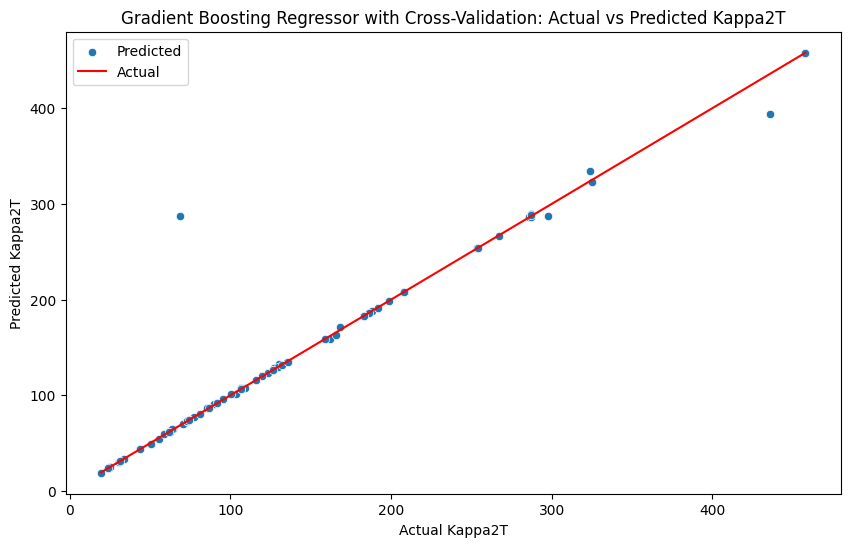

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted values for Kappa2T with cross-validation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best_gbr_kappa2T, label='Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', label='Actual')
plt.xlabel('Actual Kappa2T')
plt.ylabel('Predicted Kappa2T')
plt.title('Gradient Boosting Regressor with Cross-Validation: Actual vs Predicted Kappa2T')
plt.legend()
plt.show()

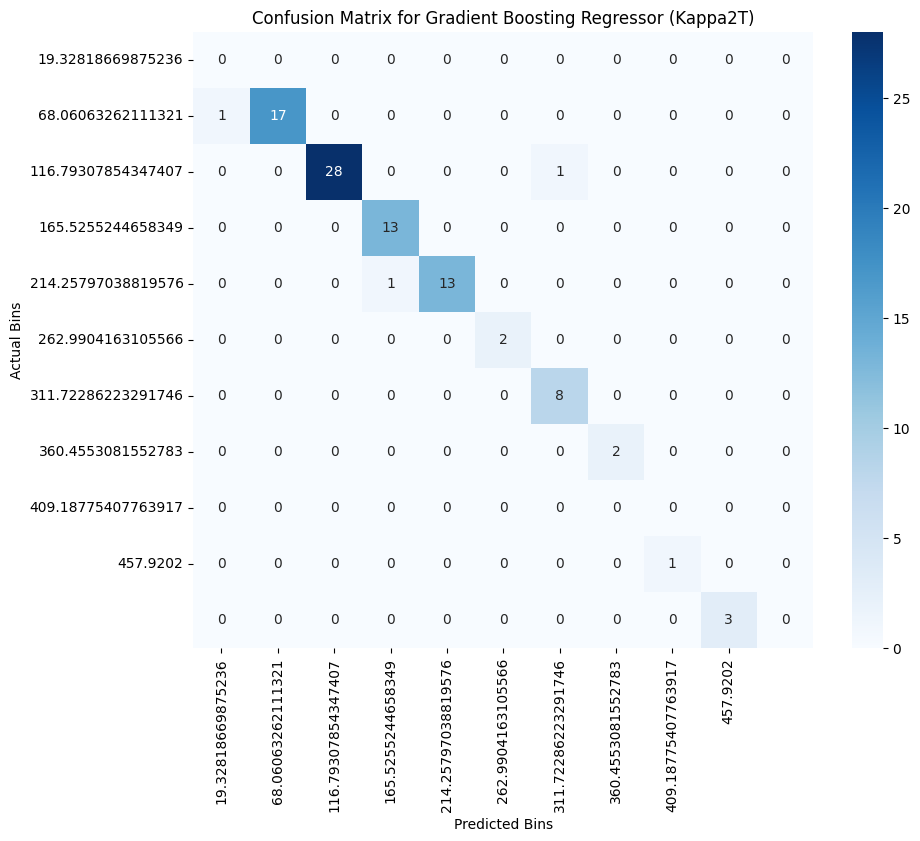

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Discretize the continuous target variable (Kappa2T) into bins
bins = np.linspace(y_test.min(), y_test.max(), 10)
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred_best_gbr_kappa2T, bins)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=bins, yticklabels=bins)
plt.xlabel('Predicted Bins')
plt.ylabel('Actual Bins')
plt.title('Confusion Matrix for Gradient Boosting Regressor (Kappa2T)')
plt.show()

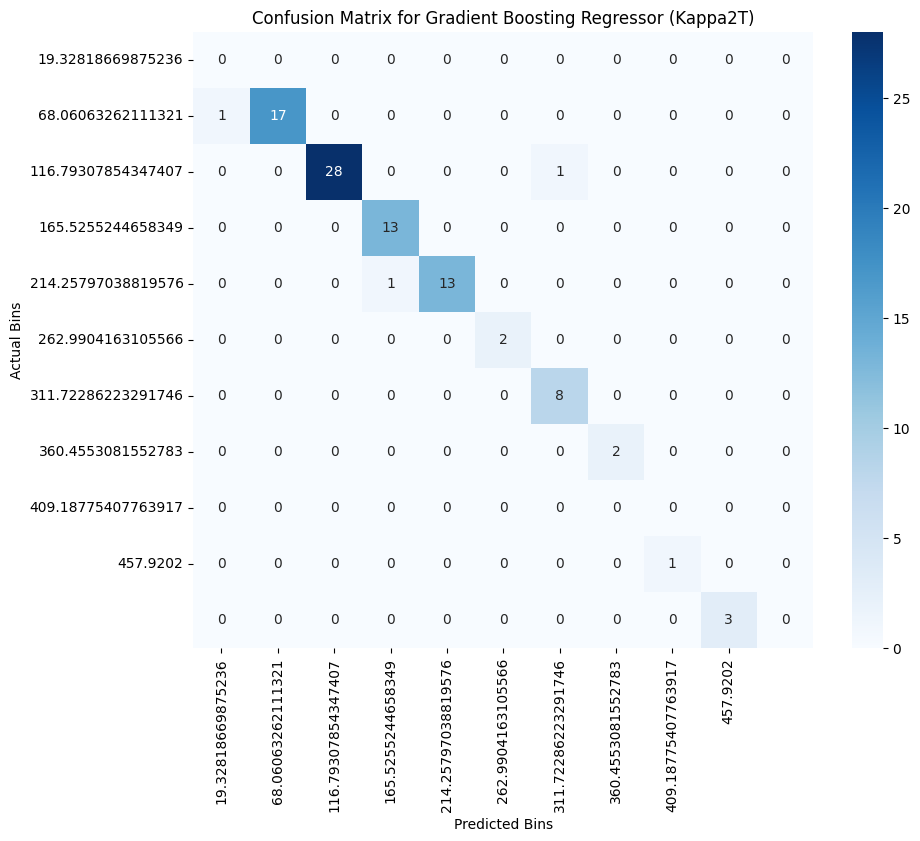

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the features and target variable
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_Lambda', 'id_gw_frequency_Hz']].values
y = df['id_kappa2T'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor with the best parameters found
best_gbr_kappa2T = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    learning_rate=0.1, 
    random_state=3
)

# Fit the model on the training data
best_gbr_kappa2T.fit(X_train, y_train)

# Predict on the test data
y_pred_best_gbr_kappa2T = best_gbr_kappa2T.predict(X_test)

# Discretize the continuous target variable (Kappa2T) into bins
bins = np.linspace(y_test.min(), y_test.max(), 10)
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred_best_gbr_kappa2T, bins)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=bins, yticklabels=bins)
plt.xlabel('Predicted Bins')
plt.ylabel('Actual Bins')
plt.title('Confusion Matrix for Gradient Boosting Regressor (Kappa2T)')
plt.show()

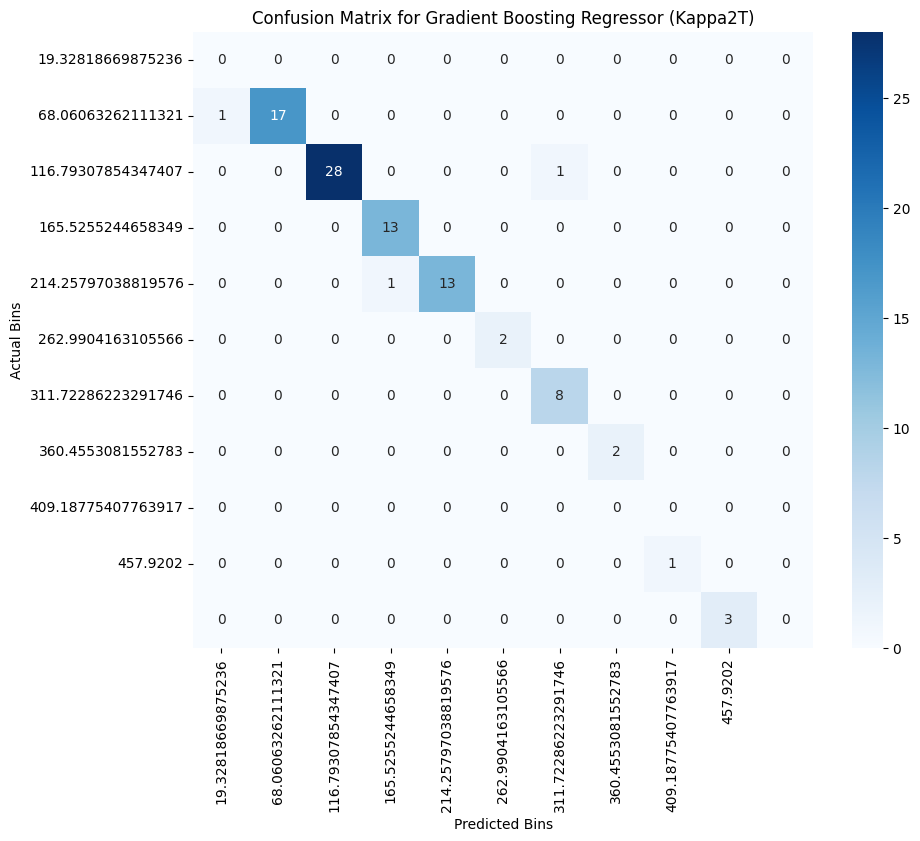

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Define the features and target variable
X = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_Lambda', 'id_gw_frequency_Hz']].values
y = df['id_kappa2T'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor with the best parameters found
best_gbr_kappa2T = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    learning_rate=0.1, 
    random_state=3
)

# Fit the model on the training data
best_gbr_kappa2T.fit(X_train, y_train)

# Predict on the test data
y_pred_best_gbr_kappa2T = best_gbr_kappa2T.predict(X_test)

# Discretize the continuous target variable (Kappa2T) into bins
bins = np.linspace(y_test.min(), y_test.max(), 10)
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred_best_gbr_kappa2T, bins)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=bins, yticklabels=bins)
plt.xlabel('Predicted Bins')
plt.ylabel('Actual Bins')
plt.title('Confusion Matrix for Gradient Boosting Regressor (Kappa2T)')
plt.show()

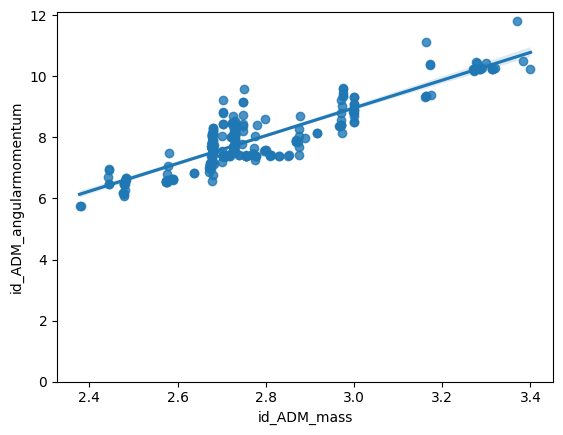

In [85]:
sns.regplot(x = 'id_ADM_mass', y = 'id_ADM_angularmomentum', data = df)
plt.ylim(0, )
plt.show()

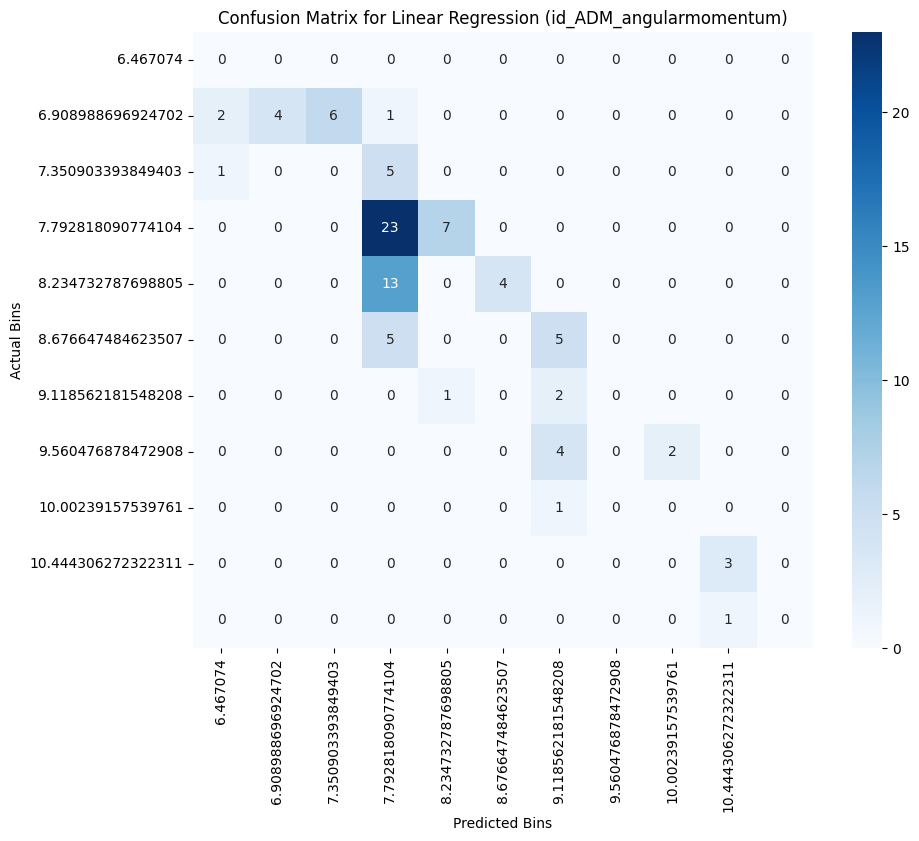

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the features and target variable
X = df[['id_ADM_mass']].values
y = df['id_ADM_angularmomentum'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the LinearRegression model
lm = LinearRegression()

# Fit the model on the training data
lm.fit(X_train, y_train)

# Predict on the test data
y_pred = lm.predict(X_test)

# Discretize the continuous target variable (id_ADM_angularmomentum) into bins
bins = np.linspace(y_test.min(), y_test.max(), 10)
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred, bins)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=bins, yticklabels=bins)
plt.xlabel('Predicted Bins')
plt.ylabel('Actual Bins')
plt.title('Confusion Matrix for Linear Regression (id_ADM_angularmomentum)')
plt.show()

In [87]:
from sklearn.metrics import r2_score

# Calculate the R^2 value for the Linear Regression model
r2_value = r2_score(y_test, y_pred)
r2_value

0.8020393348948361

In [88]:
df.drop(columns=['id_Lambda'], inplace=True)

In [89]:
# Since the 'id_Lambda' column has already been removed, let's adjust the code to exclude it from the features list.

# Define the features and target variable for the updated dataframe
X_new = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_gw_frequency_Hz']].values
y_new = df['id_kappa2T'].values

# Split the updated data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor with the best parameters
best_gbr_kappa2T_new = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    learning_rate=0.1, 
    random_state=3
)

# Fit the model on the updated training data
best_gbr_kappa2T_new.fit(X_train_new, y_train_new)

# Predict on the updated test data
y_pred_best_gbr_kappa2T_new = best_gbr_kappa2T_new.predict(X_test_new)

# Calculate the R^2 value and Mean Squared Error for the updated data
best_gbr_kappa2T_r2_new = r2_score(y_test_new, y_pred_best_gbr_kappa2T_new)
best_gbr_kappa2T_mse_new = mean_squared_error(y_test_new, y_pred_best_gbr_kappa2T_new)

best_gbr_kappa2T_r2_new, best_gbr_kappa2T_mse_new

(0.5768178319234518, 4545.284343579294)

In [90]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the updated Gradient Boosting Regressor
cv_scores_new = cross_val_score(best_gbr_kappa2T_new, X_train_new, y_train_new, cv=5, scoring='r2')

cv_scores_new

array([ 0.26443917,  0.4856115 ,  0.2763423 ,  0.16309868, -0.03708521])

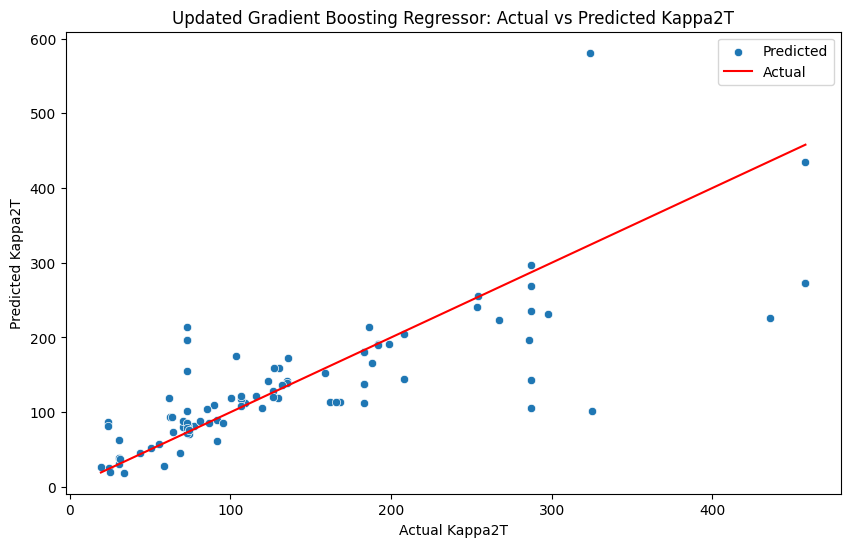

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the updated Gradient Boosting Regressor model for Kappa2T
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_new, y=y_pred_best_gbr_kappa2T_new, label='Predicted')
sns.lineplot(x=y_test_new, y=y_test_new, color='red', label='Actual')
plt.xlabel('Actual Kappa2T')
plt.ylabel('Predicted Kappa2T')
plt.title('Updated Gradient Boosting Regressor: Actual vs Predicted Kappa2T')
plt.legend()
plt.show()

In [92]:
df['id_Lambda'] = df['id_Lambda'] if 'id_Lambda' in df else None
df

,database_key,simulation_name,binary_type,reference_bibkeys,id_code,id_type,id_mass,id_rest_mass,id_mass_ratio,id_ADM_mass,...,available_resolutions,NR_simulation_key,id_gw_NR_frequency_Hz,Hybrid_window_freq_Hz,TEOB_Lambda_starA,TEOB_Lambda_starB,TEOB_version,available_runs,id_eccentricity_3PN,id_Lambda
0,THC:0006:R01,BHBlp_1.400_1.400_0.00_0.00_0.058_0.083,BNS,Radice:2016rys Radice:2017lry,LORENE,Irrotational,2.800000,3.065080,1.000000,2.770620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,THC:0035:R01,SFHo_1.460_1.460_0.00_0.00_0.062_0.125,BNS,Radice:2016rys Radice:2017lry,LORENE,Irrotational,2.920000,3.246000,1.000000,2.889660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,BAM:0130:R01,SLy_1.800_0.900_0.00_0.00_0.0322_0.062,BNS,Ujevic:2022qle,SGRID,CRV,2.700222,3.041406,2.000037,2.682408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,BAM:0159:R01,H4_1.797_1.106_0.41_-0.24_0.024_R01,BNS,Schianchi:2024vvi,SGRID,CRV,2.902295,3.201860,1.624972,2.876201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,THC:0081:R01,LS220_1.364_1.364_0.00_0.00_0.048_M0_LK_0.167,BNS,Nedora:2020hxc,LORENE,Irrotational,2.728000,3.039179,1.000000,2.703000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,THC:0058:R01,BLQ_1.364_1.364_0.00_0.00_0.048_M0_0.125,BNS,Prakash:2021wpz,LORENE,Irrotational,2.728000,3.003804,1.000000,2.703200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
295,BAM:0013:R01,ALF2_1.528_1.222_0.10_-0.10_0.0358_0.167,BNS,Dietrich:2016lyp,SGRID,CRV,2.751086,3.041081,1.250189,2.729256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
296,BAM:0051:R01,H4_1.528_1.223_0.10_0.10_0.0349_0.167,BNS,Dietrich:2016lyp,SGRID,CRV,2.750911,3.001432,1.250149,2.729567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
297,BAM:0061:R01,MS1_1.351_1.351_0.00_0.00_0.052_0.240_camr,BNS,Dietrich:2015iva,LORENE,Irrotational,2.702923,2.929283,1.000000,2.676312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [93]:
# Import the dataset again as 'df' to ensure we retain 'id_Lambda' column.
df = pd.read_csv('merged_data.csv')
df

,database_key,simulation_name,binary_type,reference_bibkeys,id_code,id_type,id_mass,id_rest_mass,id_mass_ratio,id_ADM_mass,...,neutrino_scheme,available_resolutions,NR_simulation_key,id_gw_NR_frequency_Hz,Hybrid_window_freq_Hz,TEOB_Lambda_starA,TEOB_Lambda_starB,TEOB_version,available_runs,id_eccentricity_3PN
0,THC:0006:R01,BHBlp_1.400_1.400_0.00_0.00_0.058_0.083,BNS,Radice:2016rys Radice:2017lry,LORENE,Irrotational,2.800000,3.065080,1.000000,2.770620,...,Leakage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,THC:0035:R01,SFHo_1.460_1.460_0.00_0.00_0.062_0.125,BNS,Radice:2016rys Radice:2017lry,LORENE,Irrotational,2.920000,3.246000,1.000000,2.889660,...,Leakage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAM:0130:R01,SLy_1.800_0.900_0.00_0.00_0.0322_0.062,BNS,Ujevic:2022qle,SGRID,CRV,2.700222,3.041406,2.000037,2.682408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAM:0159:R01,H4_1.797_1.106_0.41_-0.24_0.024_R01,BNS,Schianchi:2024vvi,SGRID,CRV,2.902295,3.201860,1.624972,2.876201,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,THC:0081:R01,LS220_1.364_1.364_0.00_0.00_0.048_M0_LK_0.167,BNS,Nedora:2020hxc,LORENE,Irrotational,2.728000,3.039179,1.000000,2.703000,...,M0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,THC:0058:R01,BLQ_1.364_1.364_0.00_0.00_0.048_M0_0.125,BNS,Prakash:2021wpz,LORENE,Irrotational,2.728000,3.003804,1.000000,2.703200,...,M0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,BAM:0013:R01,ALF2_1.528_1.222_0.10_-0.10_0.0358_0.167,BNS,Dietrich:2016lyp,SGRID,CRV,2.751086,3.041081,1.250189,2.729256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,BAM:0051:R01,H4_1.528_1.223_0.10_0.10_0.0349_0.167,BNS,Dietrich:2016lyp,SGRID,CRV,2.750911,3.001432,1.250149,2.729567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,BAM:0061:R01,MS1_1.351_1.351_0.00_0.00_0.052_0.240_camr,BNS,Dietrich:2015iva,LORENE,Irrotational,2.702923,2.929283,1.000000,2.676312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
import pandas as pd

# Import the dataset again as 'df' to ensure we retain the 'id_Lambda' column.
df = pd.read_csv('merged_data.csv')
df

,database_key,simulation_name,binary_type,reference_bibkeys,id_code,id_type,id_mass,id_rest_mass,id_mass_ratio,id_ADM_mass,...,neutrino_scheme,available_resolutions,NR_simulation_key,id_gw_NR_frequency_Hz,Hybrid_window_freq_Hz,TEOB_Lambda_starA,TEOB_Lambda_starB,TEOB_version,available_runs,id_eccentricity_3PN
0,THC:0006:R01,BHBlp_1.400_1.400_0.00_0.00_0.058_0.083,BNS,Radice:2016rys Radice:2017lry,LORENE,Irrotational,2.800000,3.065080,1.000000,2.770620,...,Leakage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,THC:0035:R01,SFHo_1.460_1.460_0.00_0.00_0.062_0.125,BNS,Radice:2016rys Radice:2017lry,LORENE,Irrotational,2.920000,3.246000,1.000000,2.889660,...,Leakage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAM:0130:R01,SLy_1.800_0.900_0.00_0.00_0.0322_0.062,BNS,Ujevic:2022qle,SGRID,CRV,2.700222,3.041406,2.000037,2.682408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAM:0159:R01,H4_1.797_1.106_0.41_-0.24_0.024_R01,BNS,Schianchi:2024vvi,SGRID,CRV,2.902295,3.201860,1.624972,2.876201,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,THC:0081:R01,LS220_1.364_1.364_0.00_0.00_0.048_M0_LK_0.167,BNS,Nedora:2020hxc,LORENE,Irrotational,2.728000,3.039179,1.000000,2.703000,...,M0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,THC:0058:R01,BLQ_1.364_1.364_0.00_0.00_0.048_M0_0.125,BNS,Prakash:2021wpz,LORENE,Irrotational,2.728000,3.003804,1.000000,2.703200,...,M0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,BAM:0013:R01,ALF2_1.528_1.222_0.10_-0.10_0.0358_0.167,BNS,Dietrich:2016lyp,SGRID,CRV,2.751086,3.041081,1.250189,2.729256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,BAM:0051:R01,H4_1.528_1.223_0.10_0.10_0.0349_0.167,BNS,Dietrich:2016lyp,SGRID,CRV,2.750911,3.001432,1.250149,2.729567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,BAM:0061:R01,MS1_1.351_1.351_0.00_0.00_0.052_0.240_camr,BNS,Dietrich:2015iva,LORENE,Irrotational,2.702923,2.929283,1.000000,2.676312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df.drop(columns=['id_ADM_mass'], inplace=True)
df.drop(columns=['id_ADM_angularmomentum'], inplace=True)

In [96]:
# Redefine the feature set without the dropped columns
X = df[['id_mass_ratio', 'id_gw_frequency_Hz']].values
y = df['id_kappa2T'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor with the best parameters
best_gbr_kappa2T = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    learning_rate=0.1, 
    random_state=3
)

# Fit the model on the updated training data
best_gbr_kappa2T.fit(X_train, y_train)

# Predict on the updated test data
y_pred_best_gbr_kappa2T = best_gbr_kappa2T.predict(X_test)

# Calculate the R^2 value and Mean Squared Error for the updated data
best_gbr_kappa2T_r2 = r2_score(y_test, y_pred_best_gbr_kappa2T)
best_gbr_kappa2T_mse = mean_squared_error(y_test, y_pred_best_gbr_kappa2T)

best_gbr_kappa2T_r2, best_gbr_kappa2T_mse

(-0.04220318667527101, 11194.02041148075)

In [97]:
# Ensure the 'id_Lambda' column is retained in the dataframe
# Reload the original dataframe that contains 'id_Lambda'
df = pd.read_csv('merged_data.csv')
df

,database_key,simulation_name,binary_type,reference_bibkeys,id_code,id_type,id_mass,id_rest_mass,id_mass_ratio,id_ADM_mass,...,neutrino_scheme,available_resolutions,NR_simulation_key,id_gw_NR_frequency_Hz,Hybrid_window_freq_Hz,TEOB_Lambda_starA,TEOB_Lambda_starB,TEOB_version,available_runs,id_eccentricity_3PN
0,THC:0006:R01,BHBlp_1.400_1.400_0.00_0.00_0.058_0.083,BNS,Radice:2016rys Radice:2017lry,LORENE,Irrotational,2.800000,3.065080,1.000000,2.770620,...,Leakage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,THC:0035:R01,SFHo_1.460_1.460_0.00_0.00_0.062_0.125,BNS,Radice:2016rys Radice:2017lry,LORENE,Irrotational,2.920000,3.246000,1.000000,2.889660,...,Leakage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAM:0130:R01,SLy_1.800_0.900_0.00_0.00_0.0322_0.062,BNS,Ujevic:2022qle,SGRID,CRV,2.700222,3.041406,2.000037,2.682408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAM:0159:R01,H4_1.797_1.106_0.41_-0.24_0.024_R01,BNS,Schianchi:2024vvi,SGRID,CRV,2.902295,3.201860,1.624972,2.876201,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,THC:0081:R01,LS220_1.364_1.364_0.00_0.00_0.048_M0_LK_0.167,BNS,Nedora:2020hxc,LORENE,Irrotational,2.728000,3.039179,1.000000,2.703000,...,M0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,THC:0058:R01,BLQ_1.364_1.364_0.00_0.00_0.048_M0_0.125,BNS,Prakash:2021wpz,LORENE,Irrotational,2.728000,3.003804,1.000000,2.703200,...,M0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,BAM:0013:R01,ALF2_1.528_1.222_0.10_-0.10_0.0358_0.167,BNS,Dietrich:2016lyp,SGRID,CRV,2.751086,3.041081,1.250189,2.729256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,BAM:0051:R01,H4_1.528_1.223_0.10_0.10_0.0349_0.167,BNS,Dietrich:2016lyp,SGRID,CRV,2.750911,3.001432,1.250149,2.729567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,BAM:0061:R01,MS1_1.351_1.351_0.00_0.00_0.052_0.240_camr,BNS,Dietrich:2015iva,LORENE,Irrotational,2.702923,2.929283,1.000000,2.676312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Define the features and target variable for the revised dataset without 'id_ADM_mass' and 'id_ADM_angularmomentum'
X_revised = df[['id_mass_ratio', 'id_Lambda', 'id_gw_frequency_Hz']].values
y_revised = df['id_kappa2T'].values

# Split the revised data into training and testing sets
X_train_revised, X_test_revised, y_train_revised, y_test_revised = train_test_split(X_revised, y_revised, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor with the best parameters
best_gbr_kappa2T_revised = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    learning_rate=0.1, 
    random_state=3
)

# Fit the model on the revised training data
best_gbr_kappa2T_revised.fit(X_train_revised, y_train_revised)

# Predict on the revised test data
y_pred_best_gbr_kappa2T_revised = best_gbr_kappa2T_revised.predict(X_test_revised)

# Calculate the R^2 value and Mean Squared Error for the revised data
best_gbr_kappa2T_r2_revised = r2_score(y_test_revised, y_pred_best_gbr_kappa2T_revised)
best_gbr_kappa2T_mse_revised = mean_squared_error(y_test_revised, y_pred_best_gbr_kappa2T_revised)

best_gbr_kappa2T_r2_revised, best_gbr_kappa2T_mse_revised

(0.9484237862810233, 553.9660562341063)

In [99]:
# Perform cross-validation with the revised Gradient Boosting Regressor
cv_scores_revised = cross_val_score(best_gbr_kappa2T_revised, X_train_revised, y_train_revised, cv=5, scoring='r2')

cv_scores_revised

array([0.99881778, 0.79146051, 0.92924509, 0.99980662, 0.99969861])

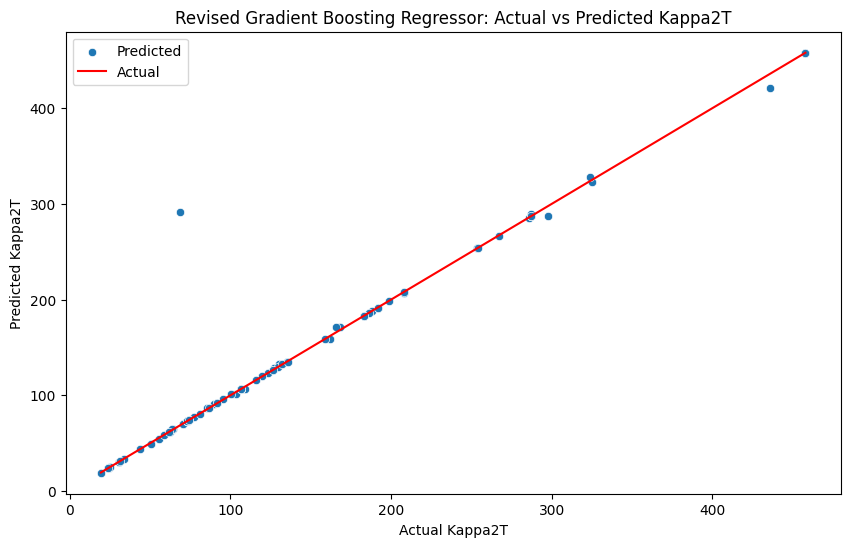

In [100]:
# Visualize the revised Gradient Boosting Regressor model for Kappa2T
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_revised, y=y_pred_best_gbr_kappa2T_revised, label='Predicted')
sns.lineplot(x=y_test_revised, y=y_test_revised, color='red', label='Actual')
plt.xlabel('Actual Kappa2T')
plt.ylabel('Predicted Kappa2T')
plt.title('Revised Gradient Boosting Regressor: Actual vs Predicted Kappa2T')
plt.legend()
plt.show()

In [101]:
# Correcting the feature list to remove the non-existent 'id_Kappa2T' column
# Define the features and target variable for the updated dataframe
X_new = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_mass_ratio', 'id_Lambda']].values

# Assuming 'id_gw_frequency_Hz' is the target variable as per original code
y_new = df['id_gw_frequency_Hz'].values

# Now proceed with the same workflow to split the data and fit the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Split the updated data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor with the best parameters
best_gbr_kappa2T_new = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    learning_rate=0.1, 
    random_state=3
)

# Fit the model on the updated training data
best_gbr_kappa2T_new.fit(X_train_new, y_train_new)

# Predict on the updated test data
y_pred_best_gbr_kappa2T_new = best_gbr_kappa2T_new.predict(X_test_new)

# Calculate the R^2 value and Mean Squared Error for the updated data
best_gbr_kappa2T_r2_new = r2_score(y_test_new, y_pred_best_gbr_kappa2T_new)
best_gbr_kappa2T_mse_new = mean_squared_error(y_test_new, y_pred_best_gbr_kappa2T_new)

(best_gbr_kappa2T_r2_new, best_gbr_kappa2T_mse_new)

(0.07510906071343548, 20674.878964977263)

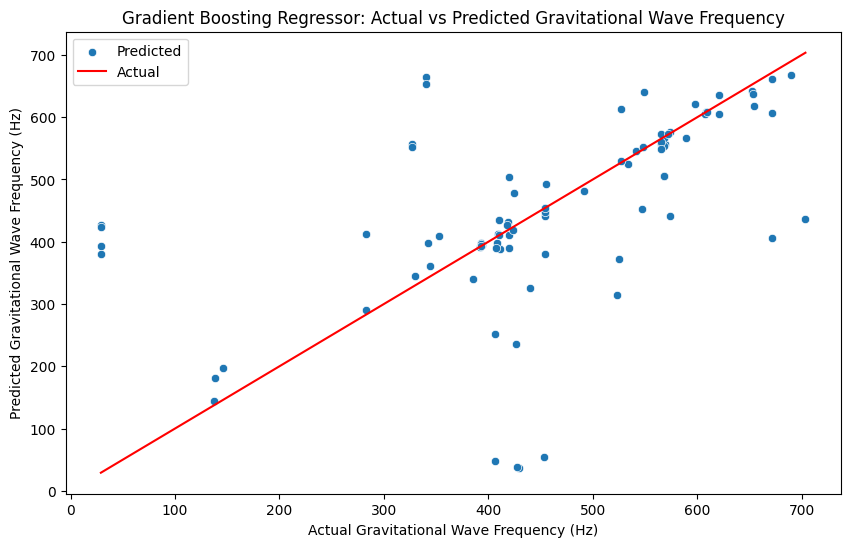

In [102]:
# Visualize the latest Gradient Boosting Regressor model for 'id_gw_frequency_Hz'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_new, y=y_pred_best_gbr_kappa2T_new, label='Predicted')
sns.lineplot(x=y_test_new, y=y_test_new, color='red', label='Actual')
plt.xlabel('Actual Gravitational Wave Frequency (Hz)')
plt.ylabel('Predicted Gravitational Wave Frequency (Hz)')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Gravitational Wave Frequency')
plt.legend()
plt.show()

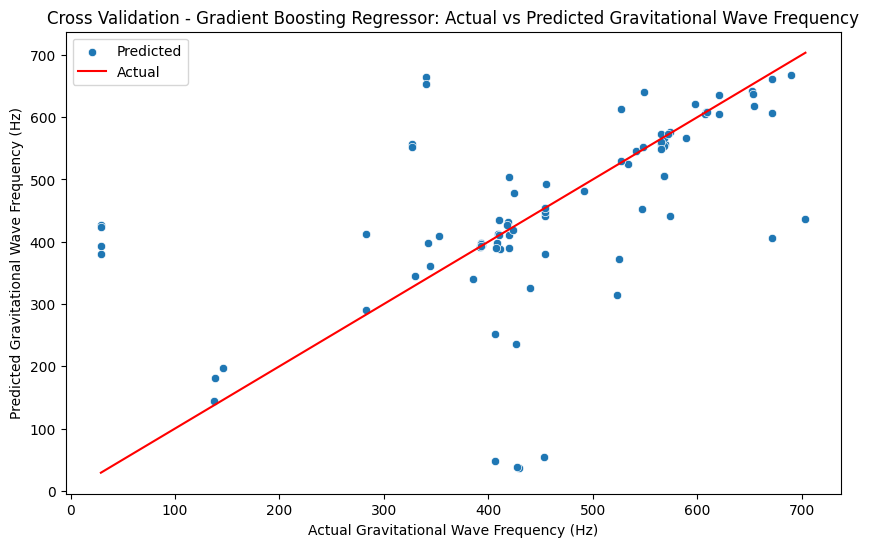

array([-0.01445988,  0.03724952,  0.19880682,  0.0435116 , -0.34538884])

In [103]:
# Perform cross-validation with the updated Gradient Boosting Regressor
cv_scores_new = cross_val_score(best_gbr_kappa2T_new, X_train_new, y_train_new, cv=5, scoring='r2')

# Visualize the updated Gradient Boosting Regressor model with cross-validation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_new, y=y_pred_best_gbr_kappa2T_new, label='Predicted')
sns.lineplot(x=y_test_new, y=y_test_new, color='red', label='Actual')
plt.xlabel('Actual Gravitational Wave Frequency (Hz)')
plt.ylabel('Predicted Gravitational Wave Frequency (Hz)')
plt.title('Cross Validation - Gradient Boosting Regressor: Actual vs Predicted Gravitational Wave Frequency')
plt.legend()
plt.show()

cv_scores_new

/tmp/ipykernel_39/2376851095.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


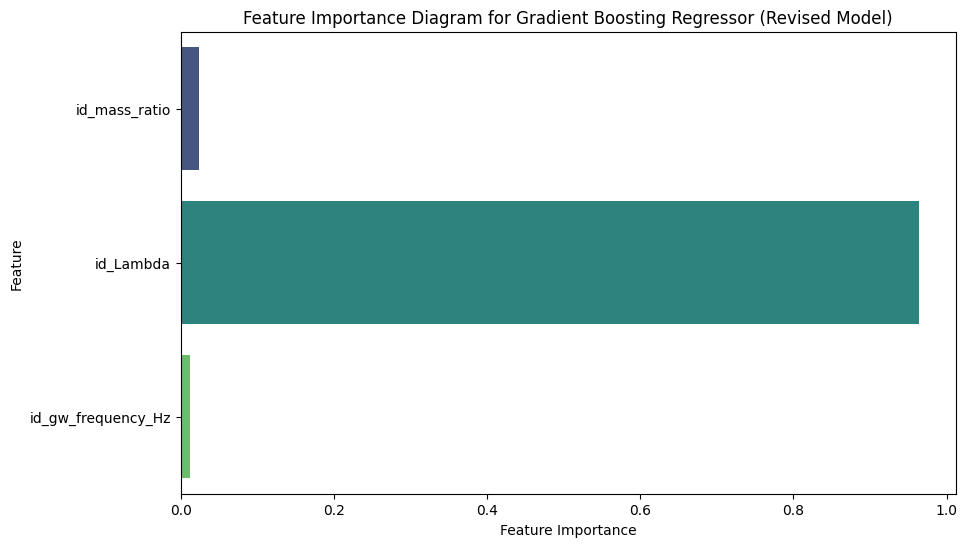

In [104]:
# Extract feature importances from the GradientBoostingRegressor model
feature_importances = best_gbr_kappa2T_revised.feature_importances_

# Define the feature names for better labeling
feature_names = ['id_mass_ratio', 'id_Lambda', 'id_gw_frequency_Hz']

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))

sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Diagram for Gradient Boosting Regressor (Revised Model)')
plt.show()

In [105]:
# Define the features and target variable including 'id_ADM_mass', 'id_ADM_angularmomentum', 'id_Lambda', 'id_mass_ratio'
X_full = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_Lambda', 'id_mass_ratio']].values
y_full = df['id_kappa2T'].values

# Split the data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor with the best parameters
best_gbr_full = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    learning_rate=0.1, 
    random_state=3
)

# Fit the model on the full training data
best_gbr_full.fit(X_train_full, y_train_full)

# Predict on the full test data
y_pred_full = best_gbr_full.predict(X_test_full)

# Calculate the R^2 value and Mean Squared Error for the full dataset
r2_full = r2_score(y_test_full, y_pred_full)
mse_full = mean_squared_error(y_test_full, y_pred_full)

(r2_full, mse_full)

(0.9482837455185629, 555.4701959004061)

/tmp/ipykernel_39/1629243577.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


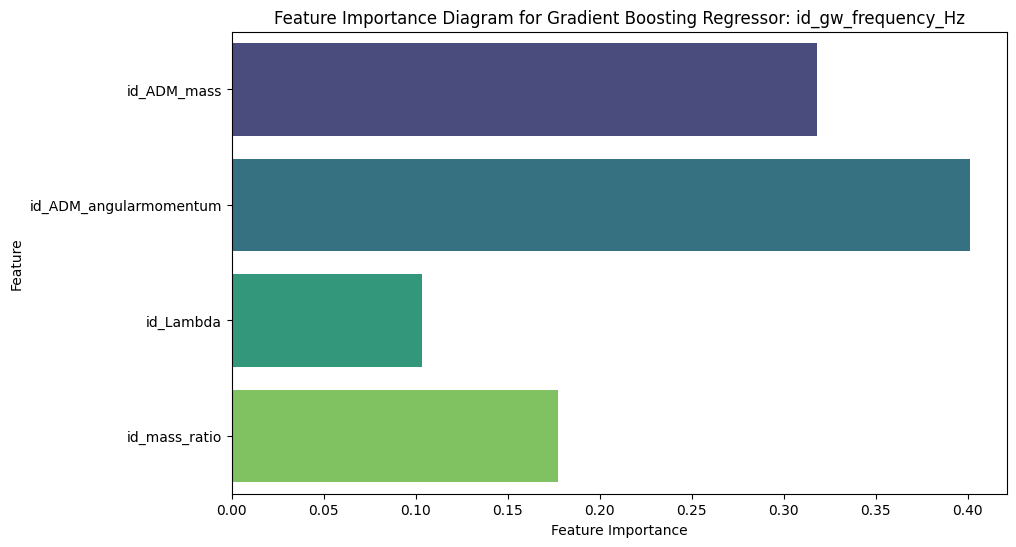

In [106]:
# Extract feature importances from the GradientBoostingRegressor model for 'id_gw_frequency_Hz'
feature_importances = best_gbr_kappa2T_new.feature_importances_

# Define the feature names for better labeling
feature_names = ['id_ADM_mass', 'id_ADM_angularmomentum', 'id_Lambda', 'id_mass_ratio']

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))

sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Diagram for Gradient Boosting Regressor: id_gw_frequency_Hz')
plt.show()

In [107]:
# Define the features and target variable for the desired prediction task
X_gw_frequency = df[['id_ADM_mass', 'id_ADM_angularmomentum', 'id_Lambda', 'id_mass_ratio']].values
y_gw_frequency = df['id_gw_frequency_Hz'].values

# Split the data into training and testing sets
X_train_gw_frequency, X_test_gw_frequency, y_train_gw_frequency, y_test_gw_frequency = train_test_split(X_gw_frequency, y_gw_frequency, test_size=0.3, random_state=3)

# Initialize the GradientBoostingRegressor with the parameters used earlier
best_gbr_gw_frequency = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    learning_rate=0.1, 
    random_state=3
)

# Fit the model on the training data
best_gbr_gw_frequency.fit(X_train_gw_frequency, y_train_gw_frequency)

# Predict on the test data
y_pred_gw_frequency = best_gbr_gw_frequency.predict(X_test_gw_frequency)

# Calculate the R^2 value and Mean Squared Error
best_gbr_gw_frequency_r2 = r2_score(y_test_gw_frequency, y_pred_gw_frequency)
best_gbr_gw_frequency_mse = mean_squared_error(y_test_gw_frequency, y_pred_gw_frequency)

(best_gbr_gw_frequency_r2, best_gbr_gw_frequency_mse)

(0.07830624590589397, 20603.409547260093)

/tmp/ipykernel_39/3083292777.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


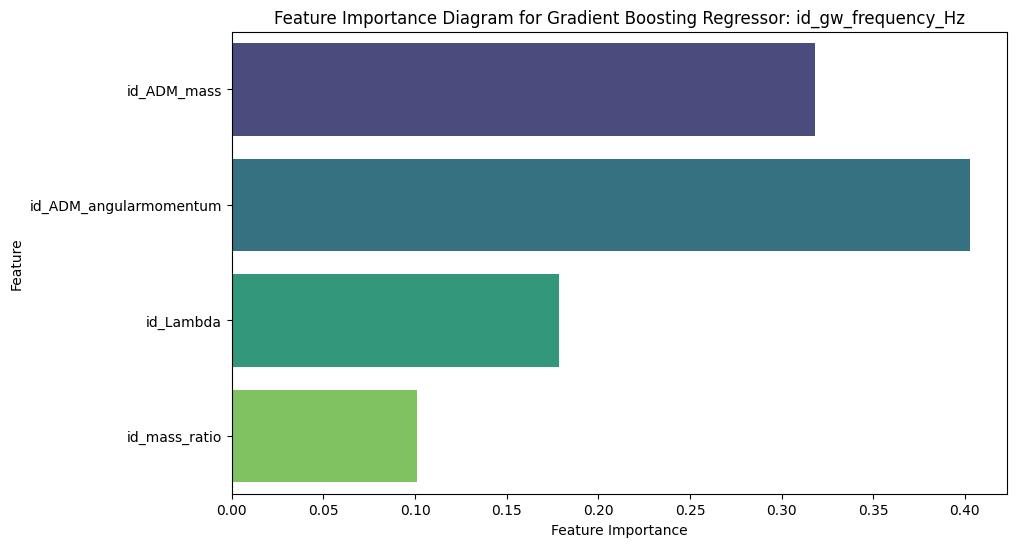

In [108]:
# Extract feature importances from the GradientBoostingRegressor model for 'id_gw_frequency_Hz'
feature_importances = best_gbr_gw_frequency.feature_importances_

# Define the feature names for better labeling
feature_names = ['id_ADM_mass', 'id_ADM_angularmomentum', 'id_Lambda', 'id_mass_ratio']

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))

sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Diagram for Gradient Boosting Regressor: id_gw_frequency_Hz')
plt.show()

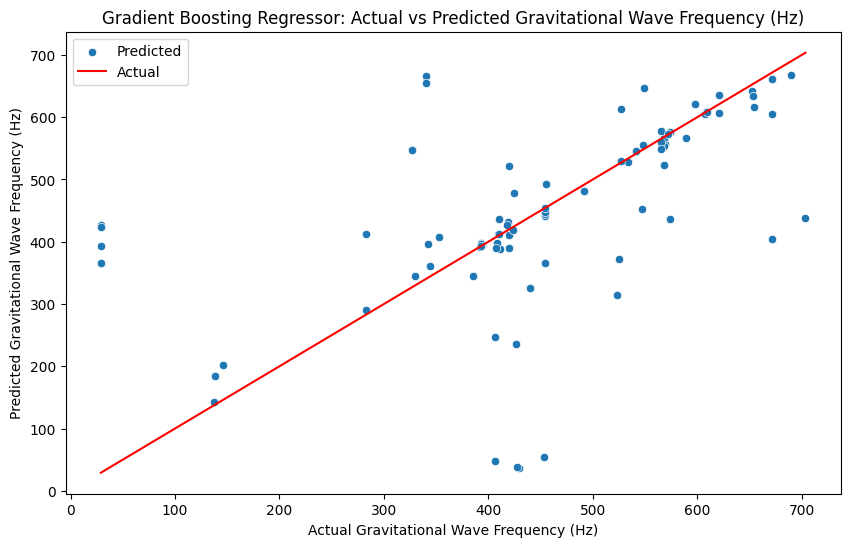

In [109]:
# Visualization for the Gradient Boosting Regressor predicting 'id_gw_frequency_Hz'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_gw_frequency, y=y_pred_gw_frequency, label='Predicted')
sns.lineplot(x=y_test_gw_frequency, y=y_test_gw_frequency, color='red', label='Actual')
plt.xlabel('Actual Gravitational Wave Frequency (Hz)')
plt.ylabel('Predicted Gravitational Wave Frequency (Hz)')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Gravitational Wave Frequency (Hz)')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54aadef8-d4b1-46d1-8134-f5df26e5777f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>